In [1]:
#Add new directory to path to import ngs and pserm
import sys
import os
path = os.getcwd()
path_with_ngs_and_pserm = os.path.dirname(os.path.dirname(path))

sys.path.append(path_with_ngs_and_pserm)

#Imports 
import tqdm
import glob
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from ngs import NGS_round_data, NGS_DMD, common_clones
from pserm import ngs_analysis, generate_clone_set
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib.colors import TwoSlopeNorm
from scipy.stats import spearmanr, pearsonr

#specify font properties for better export into adobe illustrator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#Add myriad pro font
fpath = "/Library/Fonts/Myriad Pro Regular.ttf"
aapath = '/Library/Fonts/cour.ttf'

prop = fm.FontProperties(fname=fpath, size = 20)
tickprop = fm.FontProperties(fname = fpath, size = 16)
aaprop = fm.FontProperties(fname = aapath, size = 16)

chemistry = {
    'A': 'black',
    'C': 'green',
    'D': 'red',
    'E': 'red',
    'F': 'black',
    'G': 'green',
    'H': 'blue',
    'I': 'black',
    'K': 'blue',
    'L': 'black',
    'M': 'black',
    'N': 'purple',
    'P': 'black',
    'Q': 'purple',
    'R': 'blue',
    'S': 'green',
    'T': 'green',
    'V': 'black',
    'W': 'black',
    'Y': 'green'
}

NGS package imported


In [2]:
p1_wt = 'YRRRGAWY'

p1_muts_no_wt = {
0: ['A', 'D', 'F', 'S', 'V'],
1: ['A', 'E', 'G', 'K', 'T'],
2: ['A', 'E', 'G', 'K', 'T'],
3: ['A', 'E', 'G', 'K', 'T'],
4: ['A', 'D', 'N', 'S', 'T'],
5: ['D', 'F', 'S', 'V', 'Y'],
6: ['L', 'G', 'V', 'S', 'A'],
7: ['A', 'D', 'F', 'S', 'V']
}

p1_r1 = NGS_round_data(
    Round = 3, 
    sequence_type = 'mutations', 
    samples =[
        'Input', 'Ag1_P', 'Ag01_P', 'DA_P', 'PSR_P', 'PSR_N', 
        'Ins_P', 'Ins_N', 'Ova_P', 'Ova_N'],
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_1/Rep_1', 
    wild_type = p1_wt, 
    mutations_dict = p1_muts_no_wt
)

p1_r2 = NGS_round_data(
    Round = 3, 
    sequence_type = 'mutations', 
    samples =[
        'Input', 'Ag1_P', 'Ag01_P', 'DA_P', 'PSR_P', 'PSR_N', 'PSR_NB', 
        'Ins_P', 'Ins_NS', 'Ins_NB', 'Ova_P', 'Ova_N', 'Ova_NB'],
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_1/Rep_2', 
    wild_type = p1_wt, 
    mutations_dict = p1_muts_no_wt
)

p1_clone_set_trimmed_r1 = generate_clone_set(p1_r1, ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N', 'Ins_P'])
p1_clone_set_trimmed_r2 = generate_clone_set(p1_r2, ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N', 'Ins_P'])
p1_clone_set_trimmed = list(set(p1_clone_set_trimmed_r1).union(set(p1_clone_set_trimmed_r2)))

p1_data = ngs_analysis([p1_r1, p1_r2], ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N'], clone_set = p1_clone_set_trimmed)

p1_data.generate_D()

for pssm in glob.glob('../Project_PSSMs/Project_1/*.xlsx'):
    p1_data.load_pssm(pssm.split('.xlsx')[0].split('/')[-1], pssm, excel_or_csv = 'excel')

for ppm in glob.glob('../Project_PPMs/Project_1/*.xlsx'):    
    p1_data.load_ppm(ppm.split('.xlsx')[0].split('/')[-1], ppm, excel_or_csv = 'excel')

for sample in p1_data.samples:
    if sample != 'Input':
        p1_data.generate_PSERM(In_sample = 'Input', Out_sample = sample)


['Mutation_139624.csv', 'Mutation_139625.csv', 'Mutation_139626.csv', 'Mutation_139627.csv', 'Mutation_139628.csv', 'Mutation_139629.csv', 'Mutation_139630.csv', 'Mutation_139631.csv', 'Mutation_139632.csv', 'Mutation_139633.csv']
['Mutation_140403.csv', 'Mutation_140404.csv', 'Mutation_140405.csv', 'Mutation_140406.csv', 'Mutation_140407.csv', 'Mutation_140408.csv', 'Mutation_140409.csv', 'Mutation_140410.csv', 'Mutation_140411.csv', 'Mutation_140412.csv', 'Mutation_140413.csv', 'Mutation_140414.csv', 'Mutation_140415.csv']


100%|██████████| 774931/774931 [00:01<00:00, 494821.09it/s]


## Create fixed residue PSSM

In [85]:
for pos, aalist in tqdm.tqdm(p1_data.library.items()):
    for aa in aalist:
        p1_data.generate_fixed_resi_PSSM('Input', pos, aa)
        p1_data.generate_fixed_resi_PSSM('Ag01_P', pos, aa)
        p1_data.generate_fixed_resi_PSSM('Ova_P', pos, aa)
        p1_data.generate_fixed_resi_PSSM('PSR_P', pos, aa)
        p1_data.generate_fixed_resi_PSSM('Ag1_P', pos, aa)
        p1_data.generate_fixed_resi_PSSM('Ova_N', pos, aa)
        p1_data.generate_fixed_resi_PSSM('PSR_N', pos, aa)

        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ag01_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ova_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_PSR_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ag1_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ova_N')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_PSR_N')

100%|██████████| 8/8 [09:42<00:00, 72.86s/it]


In [10]:
for pos, aalist in p1_data.library.items():
    for aa in aalist:
        p1_data.PSSM[f'{pos}_{aa}_Input'].to_excel(f'../Project_PSSMs/Project_1/Fixed_Residue_PSSM/{pos}_{aa}_Input.xlsx')
        p1_data.PSSM[f'{pos}_{aa}_Ag01_P'].to_excel(f'../Project_PSSMs/Project_1/Fixed_Residue_PSSM/{pos}_{aa}_Ag01_P.xlsx')
        p1_data.PSSM[f'{pos}_{aa}_Ova_P'].to_excel(f'../Project_PSSMs/Project_1/Fixed_Residue_PSSM/{pos}_{aa}_Ova_P.xlsx')
        p1_data.PSSM[f'{pos}_{aa}_PSR_P'].to_excel(f'../Project_PSSMs/Project_1/Fixed_Residue_PSSM/{pos}_{aa}_PSR_P.xlsx')

# Load fixed residue PSSM

In [3]:
for pssm in glob.glob('../Project_PSSMs/Project_1/Fixed_Residue_PSSM/*.xlsx'):
    p1_data.load_pssm(pssm.split('.xlsx')[0].split('/')[-1], pssm, excel_or_csv = 'excel')

for pos, aalist in tqdm.tqdm(p1_data.library.items()):
    for aa in aalist:
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ag01_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ag1_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ova_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_PSR_P')

100%|██████████| 8/8 [00:00<00:00, 358.02it/s]


In [4]:
p1_data.get_all_mut_JS_divergence_matrix('Ag01_P')
p1_data.get_all_mut_JS_divergence_matrix('Ag1_P')
p1_data.get_all_mut_JS_divergence_matrix('Ova_P')
p1_data.get_all_mut_JS_divergence_matrix('PSR_P')
#p1_data.get_all_mut_JS_divergence_matrix('Ova_N')
#p1_data.get_all_mut_JS_divergence_matrix('PSR_N')

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


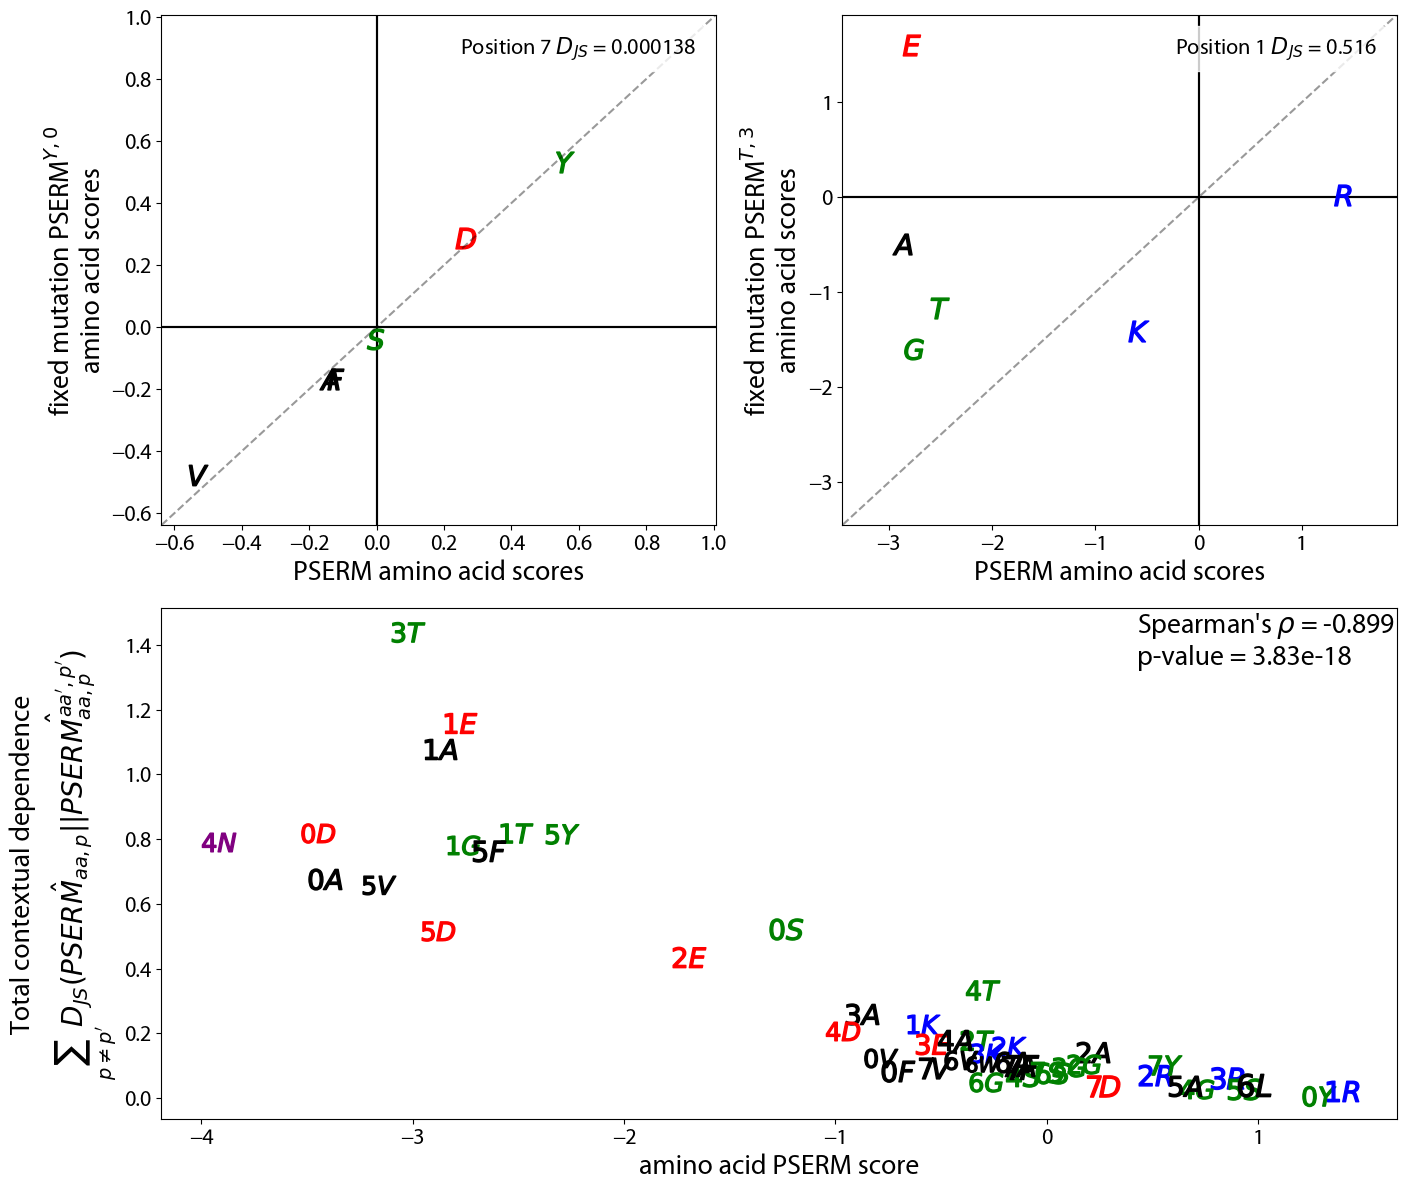

In [9]:
fig = plt.figure(figsize = (7.2 * 2, 12))
gs = matplotlib.gridspec.GridSpec(2, 2)

################## PLOT LOW/HIGH DJS scores #####################

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

plots = {
    0: [7, '0_Y', ax1, r'fixed mutation PSERM$^{Y,0}$'+'\namino acid scores'],
    1: [1, '3_T', ax2, r'fixed mutation PSERM$^{T,3}$'+'\namino acid scores']
}

for plot_data in plots.values(): 
    pos, seq_set_key, ax, ylabel = plot_data
    ax.hlines([0, 0], -100, 100, color = 'k')
    ax.vlines([0, 0], -100, 100, color = 'k')

    for aa in p1_data.library[pos]:
        m = f"${aa}$"
        color = chemistry[aa]
        
        ax.plot(
            p1_data.PSERM['Ag01_P'].loc[aa, pos], 
            p1_data.PSERM[f'{seq_set_key}_Ag01_P'].loc[aa, pos], 
            marker = m, markersize = 15, color = color)
    
    label = f'Position {pos} ' + r'$D_{JS}$ = '
    label += f"{p1_data.JS_data['Ag01_P'].loc[seq_set_key, pos]:.3}"
        
    ax.plot([-1000, 1000], [-1000, 1000], '--', alpha = 0.4, color = 'black', label = label)        
    
    legend = ax.legend(loc = 1, prop = tickprop, edgecolor = 'white', handlelength=0, handletextpad=0)
    for marker in legend.legendHandles:
        marker.set_visible(False)     
    
    pp = seq_set_key.split('_')[0]
    aap = seq_set_key.split('_')[1]

    ax.set_ylabel(ylabel, fontproperties = prop)
    ax.set_xlabel(f'PSERM amino acid scores', fontproperties = prop)
    
    x_min = min(p1_data.PSERM['Ag01_P'].loc[:, pos]) 
    x_max = max(p1_data.PSERM['Ag01_P'].loc[:, pos])
    y_min = min(p1_data.PSERM[f'{seq_set_key}_Ag01_P'].loc[p1_data.library[pos], pos]) 
    y_max = max(p1_data.PSERM[f'{seq_set_key}_Ag01_P'].loc[p1_data.library[pos], pos])

    mmin = min(x_min, y_min)
    mmax = max(x_max, y_max)
    #Fix this....
    #ax.text(mmin - 0.16*abs(mmin), 0.85*mmax, )
    
    ax.set_xlim(mmin - 0.2*abs(mmin), mmax + 0.2*abs(mmax))
    ax.set_ylim(mmin - 0.2*abs(mmin), mmax + 0.2*abs(mmax))

    for tick in ax.get_xticklabels():
        tick.set_fontproperties(tickprop)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(tickprop)

#################### PLOT DJS vs PSERM #################

ax3 = fig.add_subplot(gs[1::, :])
ax3.set_xlabel(r'amino acid PSERM score', fontproperties = prop)

ax3_ylabel = 'Total contextual dependence\n'
ax3_ylabel += r"$\sum_{p \neq p'}{D_{JS}(\hat{PSERM_{aa,p}}||\hat{PSERM^{aa',p'}_{aa,p}})}$"
ax3.set_ylabel(ax3_ylabel, fontproperties = prop)
ax3.plot

ag_mask = np.zeros_like(p1_data.JS_data['Ag01_P'])
row = 0
for j in range(len(p1_data.wt)):
    for _ in range(len(p1_data.library[j])):
        ag_mask[row, j] = 1
        row += 1

x, y = [], []
for pos, aa_list in p1_data.library.items():
    for aa in aa_list:
        x.append(p1_data.PSERM['Ag01_P'].loc[aa, pos])
        y.append(((1 - ag_mask) * p1_data.JS_data['Ag01_P']).loc[f'{pos}_{aa}', :].sum())

        ax3.plot(x[-1], y[-1], color = chemistry[aa], marker = f'${pos}{aa}$', markersize = 25)
r, p = spearmanr(x, y)
corr_text = r"Spearman's $\rho$ = " + f'{r:.3}\n' + f'p-value = {p:.3}'
ax3.annotate(corr_text, (0.425, 1.34), fontproperties = prop)

for tick in ax3.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax3.get_yticklabels():
    tick.set_fontproperties(tickprop)
plt.tight_layout()
plt.savefig('Fig 4. Contextual Preference.pdf')

plt.show()

bdat NOT subset; don't know how to subset; dropped
bloc NOT subset; don't know how to subset; dropped
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


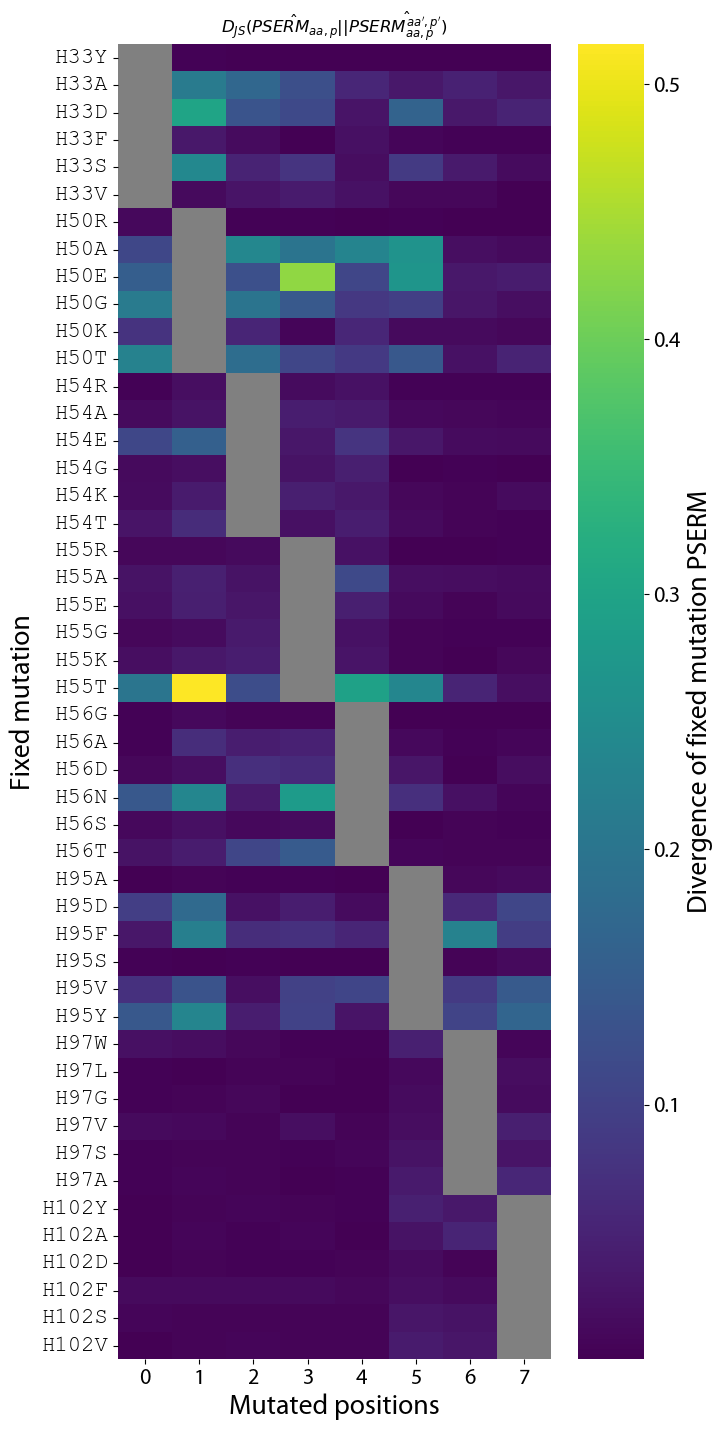

In [25]:
fig, ax = plt.subplots(figsize = (7.2 , 7.2 * 2))
############# Plot Heatmap of DJS ####################
ag_mask = np.zeros_like(p1_data.JS_data['Ag01_P'])
row = 0
for j in range(len(p1_data.wt)):
    for _ in range(len(p1_data.library[j])):
        ag_mask[row, j] = 1
        row += 1

sns.heatmap(p1_data.JS_data['Ag01_P'], mask = ag_mask, ax = ax, cmap = 'viridis')#, cbar_kws={"shrink": 0.55})
ax.set_facecolor('grey')

current_yticks = ax.get_yticklabels()
new_yticks = [
    f"{mutated_pos[int(t.get_text().split('_')[0])]}{t.get_text().split('_')[1]}" for t in current_yticks]
ax.set_xlabel('Mutated positions', fontproperties = prop)
ax.set_ylabel('Fixed mutation', fontproperties = prop)
ax.set_yticklabels(new_yticks)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(aaprop)
    tick.set_rotation(0)

cbar_label = r"Divergence of fixed mutation PSERM" 
ax_title = r"$\hat{D_{JS}(PSERM_{aa,p}}||\hat{PSERM^{aa',p'}_{aa,p}})$"

colorbar = ax.collections[0].colorbar
colorbar.set_label(cbar_label, fontproperties = prop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)
ax.set_title(ax_title)

plt.tight_layout()
plt.savefig('Fig S3 All mutations Ag JS divergence.pdf')
plt.show()

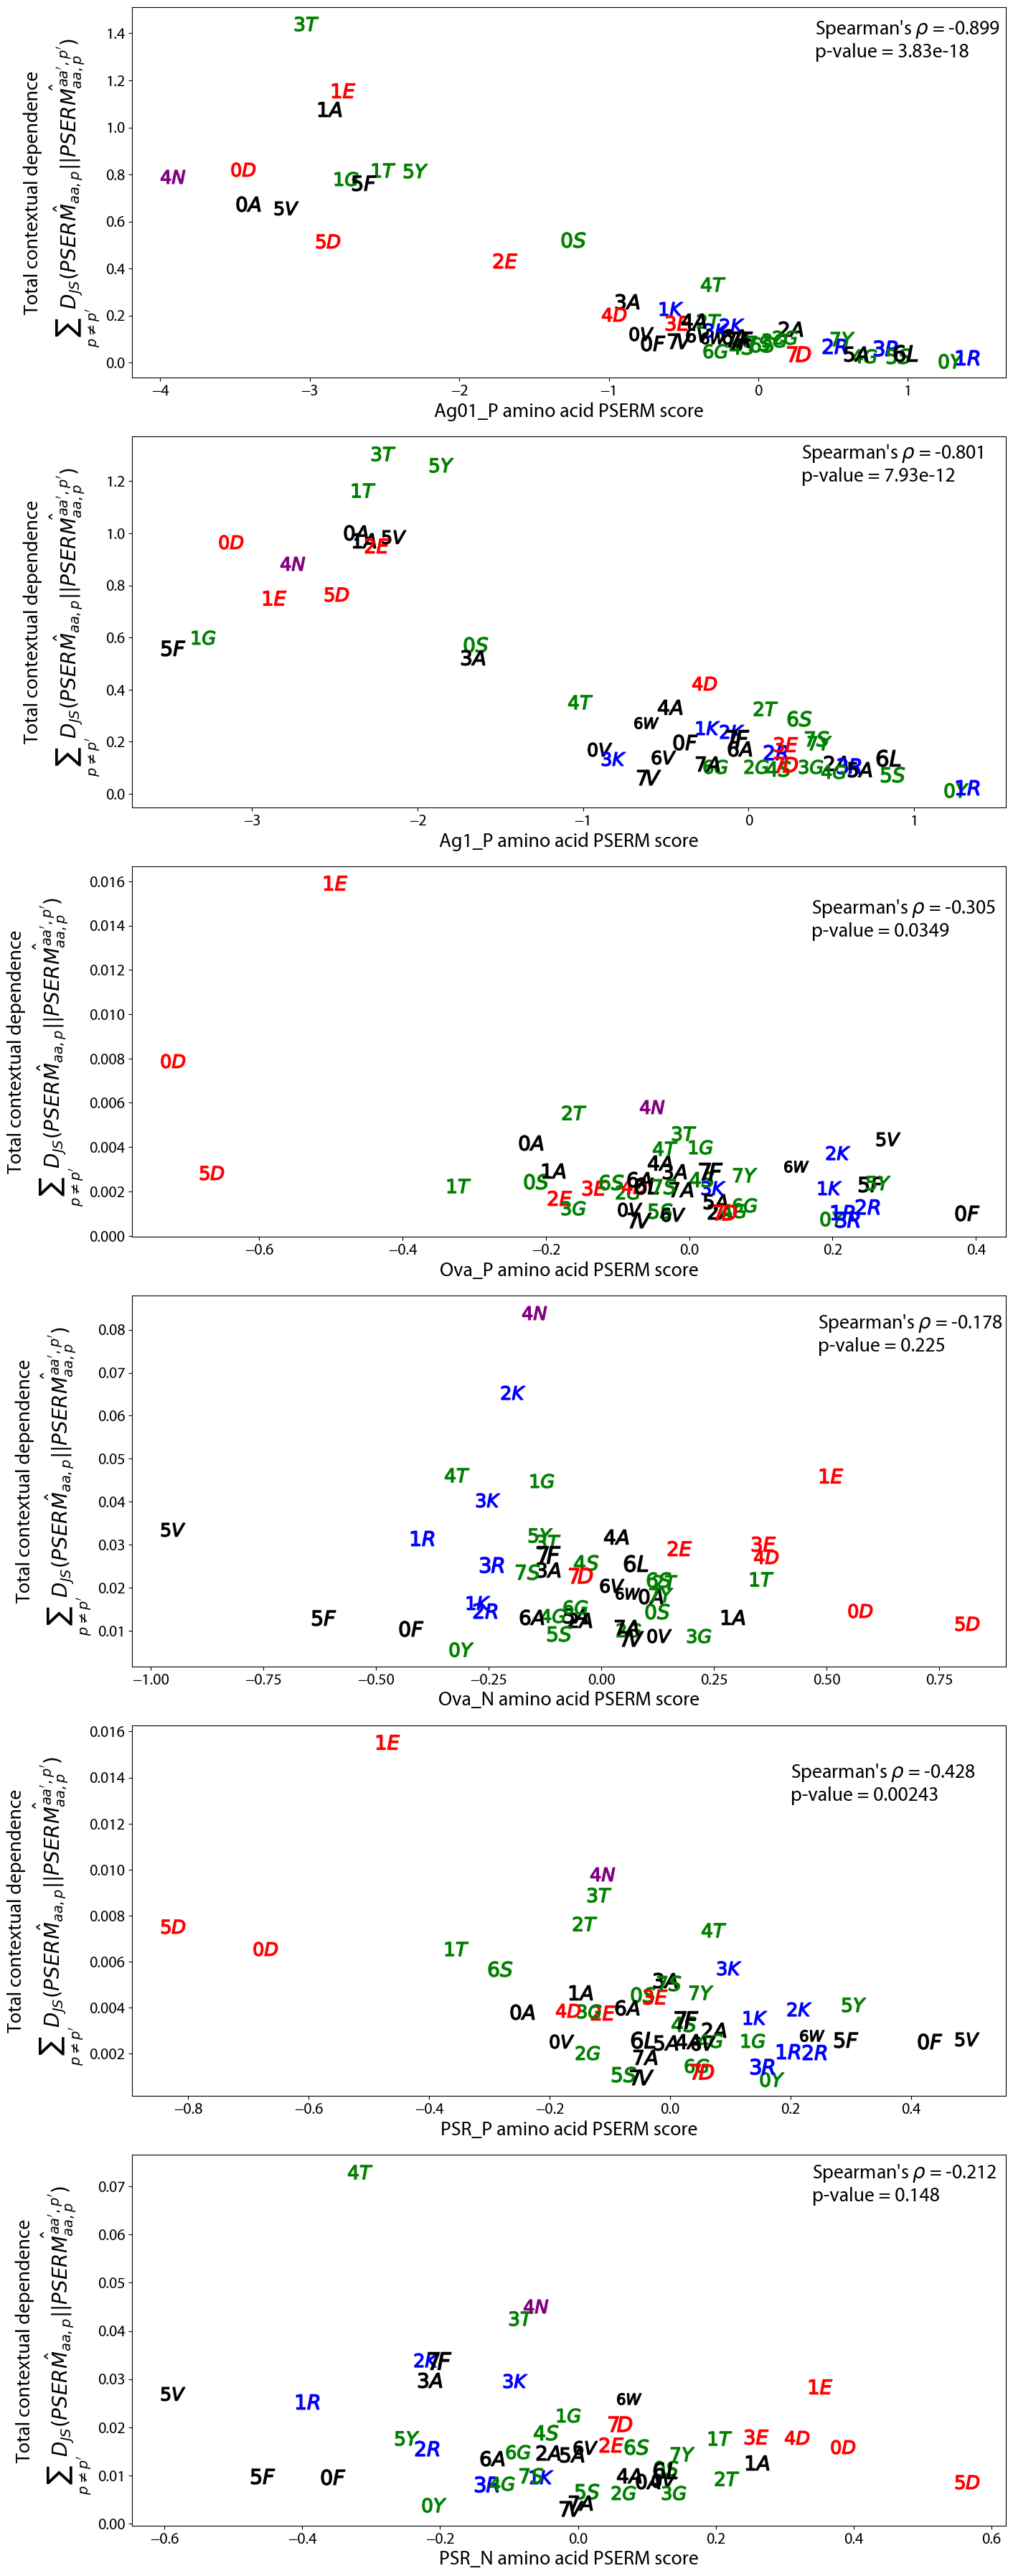

In [97]:
fig, axs = plt.subplots(6, 1, figsize = (7.2 * 2, 6 * 6))

sample = ['Ag01_P', 'Ag1_P', 'Ova_P', 'Ova_N', 'PSR_P', 'PSR_N']
loc = [(0.38, 1.3), (0.32, 1.2), (0.17, 0.0135), (0.48, 0.075), (0.2, 0.013), (0.34, 0.067)]

for i, ax in enumerate(axs.ravel()):

    ax.set_xlabel(f'{sample[i]} amino acid PSERM score', fontproperties = prop)

    ax_ylabel = 'Total contextual dependence\n'
    ax_ylabel += r"$\sum_{p \neq p'}{D_{JS}(\hat{PSERM_{aa,p}}||\hat{PSERM^{aa',p'}_{aa,p}})}$"
    ax.set_ylabel(ax_ylabel, fontproperties = prop)

    mask = np.zeros_like(p1_data.JS_data[sample[i]])
    row = 0
    for j in range(len(p1_data.wt)):
        for _ in range(len(p1_data.library[j])):
            mask[row, j] = 1
            row += 1

    x, y = [], []
    for pos, aa_list in p1_data.library.items():
        for aa in aa_list:
            x.append(p1_data.PSERM[sample[i]].loc[aa, pos])
            y.append(((1 - mask) * p1_data.JS_data[sample[i]]).loc[f'{pos}_{aa}', :].sum())

            ax.plot(x[-1], y[-1], color = chemistry[aa], marker = f'${pos}{aa}$', markersize = 25)
    r, p = spearmanr(x, y)
    corr_text = r"Spearman's $\rho$ = " + f'{r:.3}\n' + f'p-value = {p:.3}'
    ax.annotate(corr_text, loc[i], fontproperties = prop)

    for tick in ax.get_xticklabels():
        tick.set_fontproperties(tickprop)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(tickprop)
plt.tight_layout()
#plt.savefig('Fig 4. Contextual Preference.pdf')

plt.show()

# Figure 6

In [2]:
def create_contextual_dependence(ngs_analysis, sample, plots_data, corr_loc, fname = None, show = True, mut_pos = None, num_ticks = None, reagent = 'Ag01_P'):
    fig = plt.figure(figsize = (7.2*1.25, 6*1.25))
    gs = matplotlib.gridspec.GridSpec(2, 2)
    
    ngs_analysis.get_all_mut_JS_divergence_matrix(sample)    
    
    mask = np.zeros_like(ngs_analysis.JS_data[sample])
    row = 0
    for j in range(len(ngs_analysis.wt)):
        for _ in range(len(ngs_analysis.library[j])):
            mask[row, j] = 1
            row += 1
    ################## PLOT LOW/HIGH DJS scores #####################

    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    axs = [ax1, ax2]

    plots = {}
    for i, (k, data) in enumerate(plots_data.items()):
        plots[k] = [data[0], data[1], axs[i], data[2]]

    for plot_data in plots.values(): 
        pos, seq_set_key, ax, ylabel = plot_data
        ax.hlines([0], -10, 100, color = 'k')
        ax.vlines([0], -10, 100, color = 'k')

        for aa in ngs_analysis.library[pos]:
            m = f"${aa}$"
            color = chemistry[aa]
            
            ax.plot(
                ngs_analysis.PSERM[sample].loc[aa, pos], 
                ngs_analysis.PSERM[f'{seq_set_key}_{reagent}'].loc[aa, pos], 
                marker = m, markersize = 15, color = color)
        if mut_pos is not None:
            label = 'PSERM site-specific scores'+'\nVH residue '+f'{mut_pos[pos]}'
        else:
            label = 'PSERM site-specific scores'+'\nVH residue '+f'{pos}'
            
        ax.plot([-100, 100], [-100, 100], '--', alpha = 0.4, color = 'black', label = label)        
        
        legend = ax.legend(loc = 1, prop = tickprop, edgecolor = 'white', handlelength=0, handletextpad=0)
        for marker in legend.legendHandles:
            marker.set_visible(False)     
        
        pp = seq_set_key.split('_')[0]
        aap = seq_set_key.split('_')[1]

        ax.set_ylabel(ylabel, fontproperties = tickprop)
        ax.set_xlabel(f'Scores without fixed residue', fontproperties = tickprop)
        
        x_min = min(ngs_analysis.PSERM[sample].loc[:, pos]) 
        x_max = max(ngs_analysis.PSERM[sample].loc[:, pos])
        y_min = min(ngs_analysis.PSERM[f'{seq_set_key}_{reagent}'].loc[ngs_analysis.library[pos], pos]) 
        y_max = max(ngs_analysis.PSERM[f'{seq_set_key}_{reagent}'].loc[ngs_analysis.library[pos], pos])

        mmin = min(x_min, y_min)
        mmax = max(x_max, y_max)
        
        ax.set_xlim(mmin - 0.2*abs(mmin), mmax + 0.2*abs(mmax))
        ax.set_ylim(mmin - 0.2*abs(mmin), mmax + 0.2*abs(mmax))
        if num_ticks is None:
            num_ticks = 4
        ax.set_xticks(np.linspace(round(mmin * 2)/2, round(mmax * 2)/2, num_ticks))
        ax.set_yticks(np.linspace(round(mmin * 2)/2, round(mmax * 2)/2, num_ticks))
        
        for tick in ax.get_xticklabels():
            tick.set_fontproperties(tickprop)
        for tick in ax.get_yticklabels():
            tick.set_fontproperties(tickprop)

    #################### PLOT DJS vs PSERM #################

    ax3 = fig.add_subplot(gs[1::, :])
    ax3.set_xlabel(r'PSERM site-specific scores without fixed residue', fontproperties = prop)

    ax3_ylabel = 'Total contextual dependence\n'
    ax3.set_ylabel(ax3_ylabel, fontproperties = tickprop)
    ax3.plot

    x, y = [], []
    for pos, aa_list in ngs_analysis.library.items():
        for aa in aa_list:
            x.append(ngs_analysis.PSERM[sample].loc[aa, pos])
            y.append(((1 - mask) * ngs_analysis.JS_data[sample]).loc[f'{pos}_{aa}', :].sum())
            if mut_pos is not None:
                ax3.plot(x[-1], y[-1], color = chemistry[aa], marker = f'${aa}({mut_pos[pos]})$', markersize = 50)
            else:
                ax3.plot(x[-1], y[-1], color = chemistry[aa], marker = f'${aa}{pos}$', markersize = 50)

    r, p = spearmanr(x, y)
    corr_text = r"Spearman's $\rho$ = " + f'{r:.3}\n' + f'p-value = {p:.3}'
    ax3.annotate(corr_text, corr_loc, fontproperties = prop)
    
    ax3.set_yticks(np.linspace(round(min(y) * 2)/2, round(max(y) * 2)/2, num_ticks))
    for tick in ax3.get_xticklabels():
        tick.set_fontproperties(tickprop)
    for tick in ax3.get_yticklabels():
        tick.set_fontproperties(tickprop)

    plt.tight_layout()
    if fname is not None:
        if not fname.endswith('.pdf'):
            fname = f'{fname}.pdf'
        else:
            plt.savefig(fname, transparent = True)
    if show:
        plt.show()


['Mutation_139624.csv', 'Mutation_139625.csv', 'Mutation_139626.csv', 'Mutation_139627.csv', 'Mutation_139628.csv', 'Mutation_139629.csv', 'Mutation_139630.csv', 'Mutation_139631.csv', 'Mutation_139632.csv', 'Mutation_139633.csv']
['Mutation_140403.csv', 'Mutation_140404.csv', 'Mutation_140405.csv', 'Mutation_140406.csv', 'Mutation_140407.csv', 'Mutation_140408.csv', 'Mutation_140409.csv', 'Mutation_140410.csv', 'Mutation_140411.csv', 'Mutation_140412.csv', 'Mutation_140413.csv', 'Mutation_140414.csv', 'Mutation_140415.csv']


100%|██████████| 8/8 [00:00<00:00, 365.40it/s]


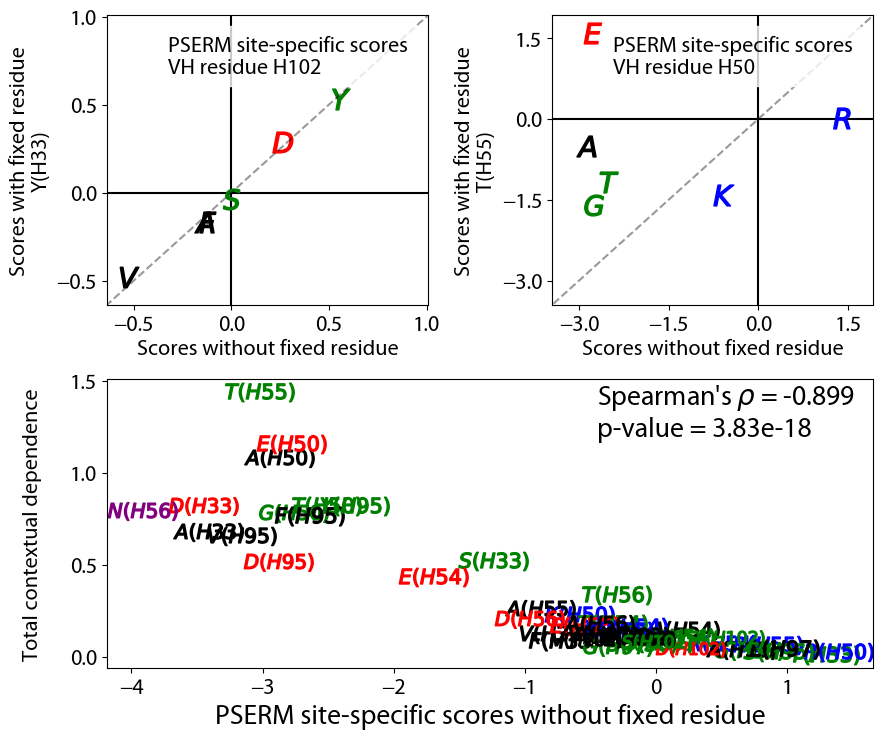

In [3]:
p1_wt = 'YRRRGAWY'

p1_muts_no_wt = {
0: ['A', 'D', 'F', 'S', 'V'],
1: ['A', 'E', 'G', 'K', 'T'],
2: ['A', 'E', 'G', 'K', 'T'],
3: ['A', 'E', 'G', 'K', 'T'],
4: ['A', 'D', 'N', 'S', 'T'],
5: ['D', 'F', 'S', 'V', 'Y'],
6: ['L', 'G', 'V', 'S', 'A'],
7: ['A', 'D', 'F', 'S', 'V']
}

p1_r1 = NGS_round_data(
    Round = 3, 
    sequence_type = 'mutations', 
    samples =[
        'Input', 'Ag1_P', 'Ag01_P', 'DA_P', 'PSR_P', 'PSR_N', 
        'Ins_P', 'Ins_N', 'Ova_P', 'Ova_N'],
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_1/Rep_1', 
    wild_type = p1_wt, 
    mutations_dict = p1_muts_no_wt
)

p1_r2 = NGS_round_data(
    Round = 3, 
    sequence_type = 'mutations', 
    samples =[
        'Input', 'Ag1_P', 'Ag01_P', 'DA_P', 'PSR_P', 'PSR_N', 'PSR_NB', 
        'Ins_P', 'Ins_NS', 'Ins_NB', 'Ova_P', 'Ova_N', 'Ova_NB'],
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_1/Rep_2', 
    wild_type = p1_wt, 
    mutations_dict = p1_muts_no_wt
)

p1_clone_set_trimmed_r1 = generate_clone_set(p1_r1, ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N', 'Ins_P'])
p1_clone_set_trimmed_r2 = generate_clone_set(p1_r2, ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N', 'Ins_P'])
p1_clone_set_trimmed = list(set(p1_clone_set_trimmed_r1).union(set(p1_clone_set_trimmed_r2)))

p1_data = ngs_analysis([p1_r1, p1_r2], ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N'], clone_set = p1_clone_set_trimmed)

p1_data.generate_D()

for pssm in glob.glob('../Project_PSSMs/Project_1/*.xlsx'):
    p1_data.load_pssm(pssm.split('.xlsx')[0].split('/')[-1], pssm, excel_or_csv = 'excel')

for ppm in glob.glob('../Project_PPMs/Project_1/*.xlsx'):    
    p1_data.load_ppm(ppm.split('.xlsx')[0].split('/')[-1], ppm, excel_or_csv = 'excel')

for sample in p1_data.samples:
    if sample != 'Input':
        p1_data.generate_PSERM(In_sample = 'Input', Out_sample = sample)

for pssm in glob.glob('../Project_PSSMs/Project_1/Fixed_Residue_PSSM/*.xlsx'):
    p1_data.load_pssm(pssm.split('.xlsx')[0].split('/')[-1], pssm, excel_or_csv = 'excel')

for pos, aalist in tqdm.tqdm(p1_data.library.items()):
    for aa in aalist:
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ag01_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ag1_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ova_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_PSR_P')

corr_loc = (-.45, 1.2)

plots = {
    0: [7, '0_Y', 'Scores with fixed residue\nY(H33)'],
    1: [1, '3_T', 'Scores with fixed residue\nT(H55)']
}

create_contextual_dependence(
    ngs_analysis = p1_data, sample = 'Ag01_P', plots_data = plots, corr_loc = corr_loc, 
    fname = 'Fig 6. Contextual Preference.pdf', 
    mut_pos=['H33', 'H50', 'H54', 'H55', 'H56', 'H95', 'H97', 'H102'], 
    reagent = 'Ag01_P')

# Ag1

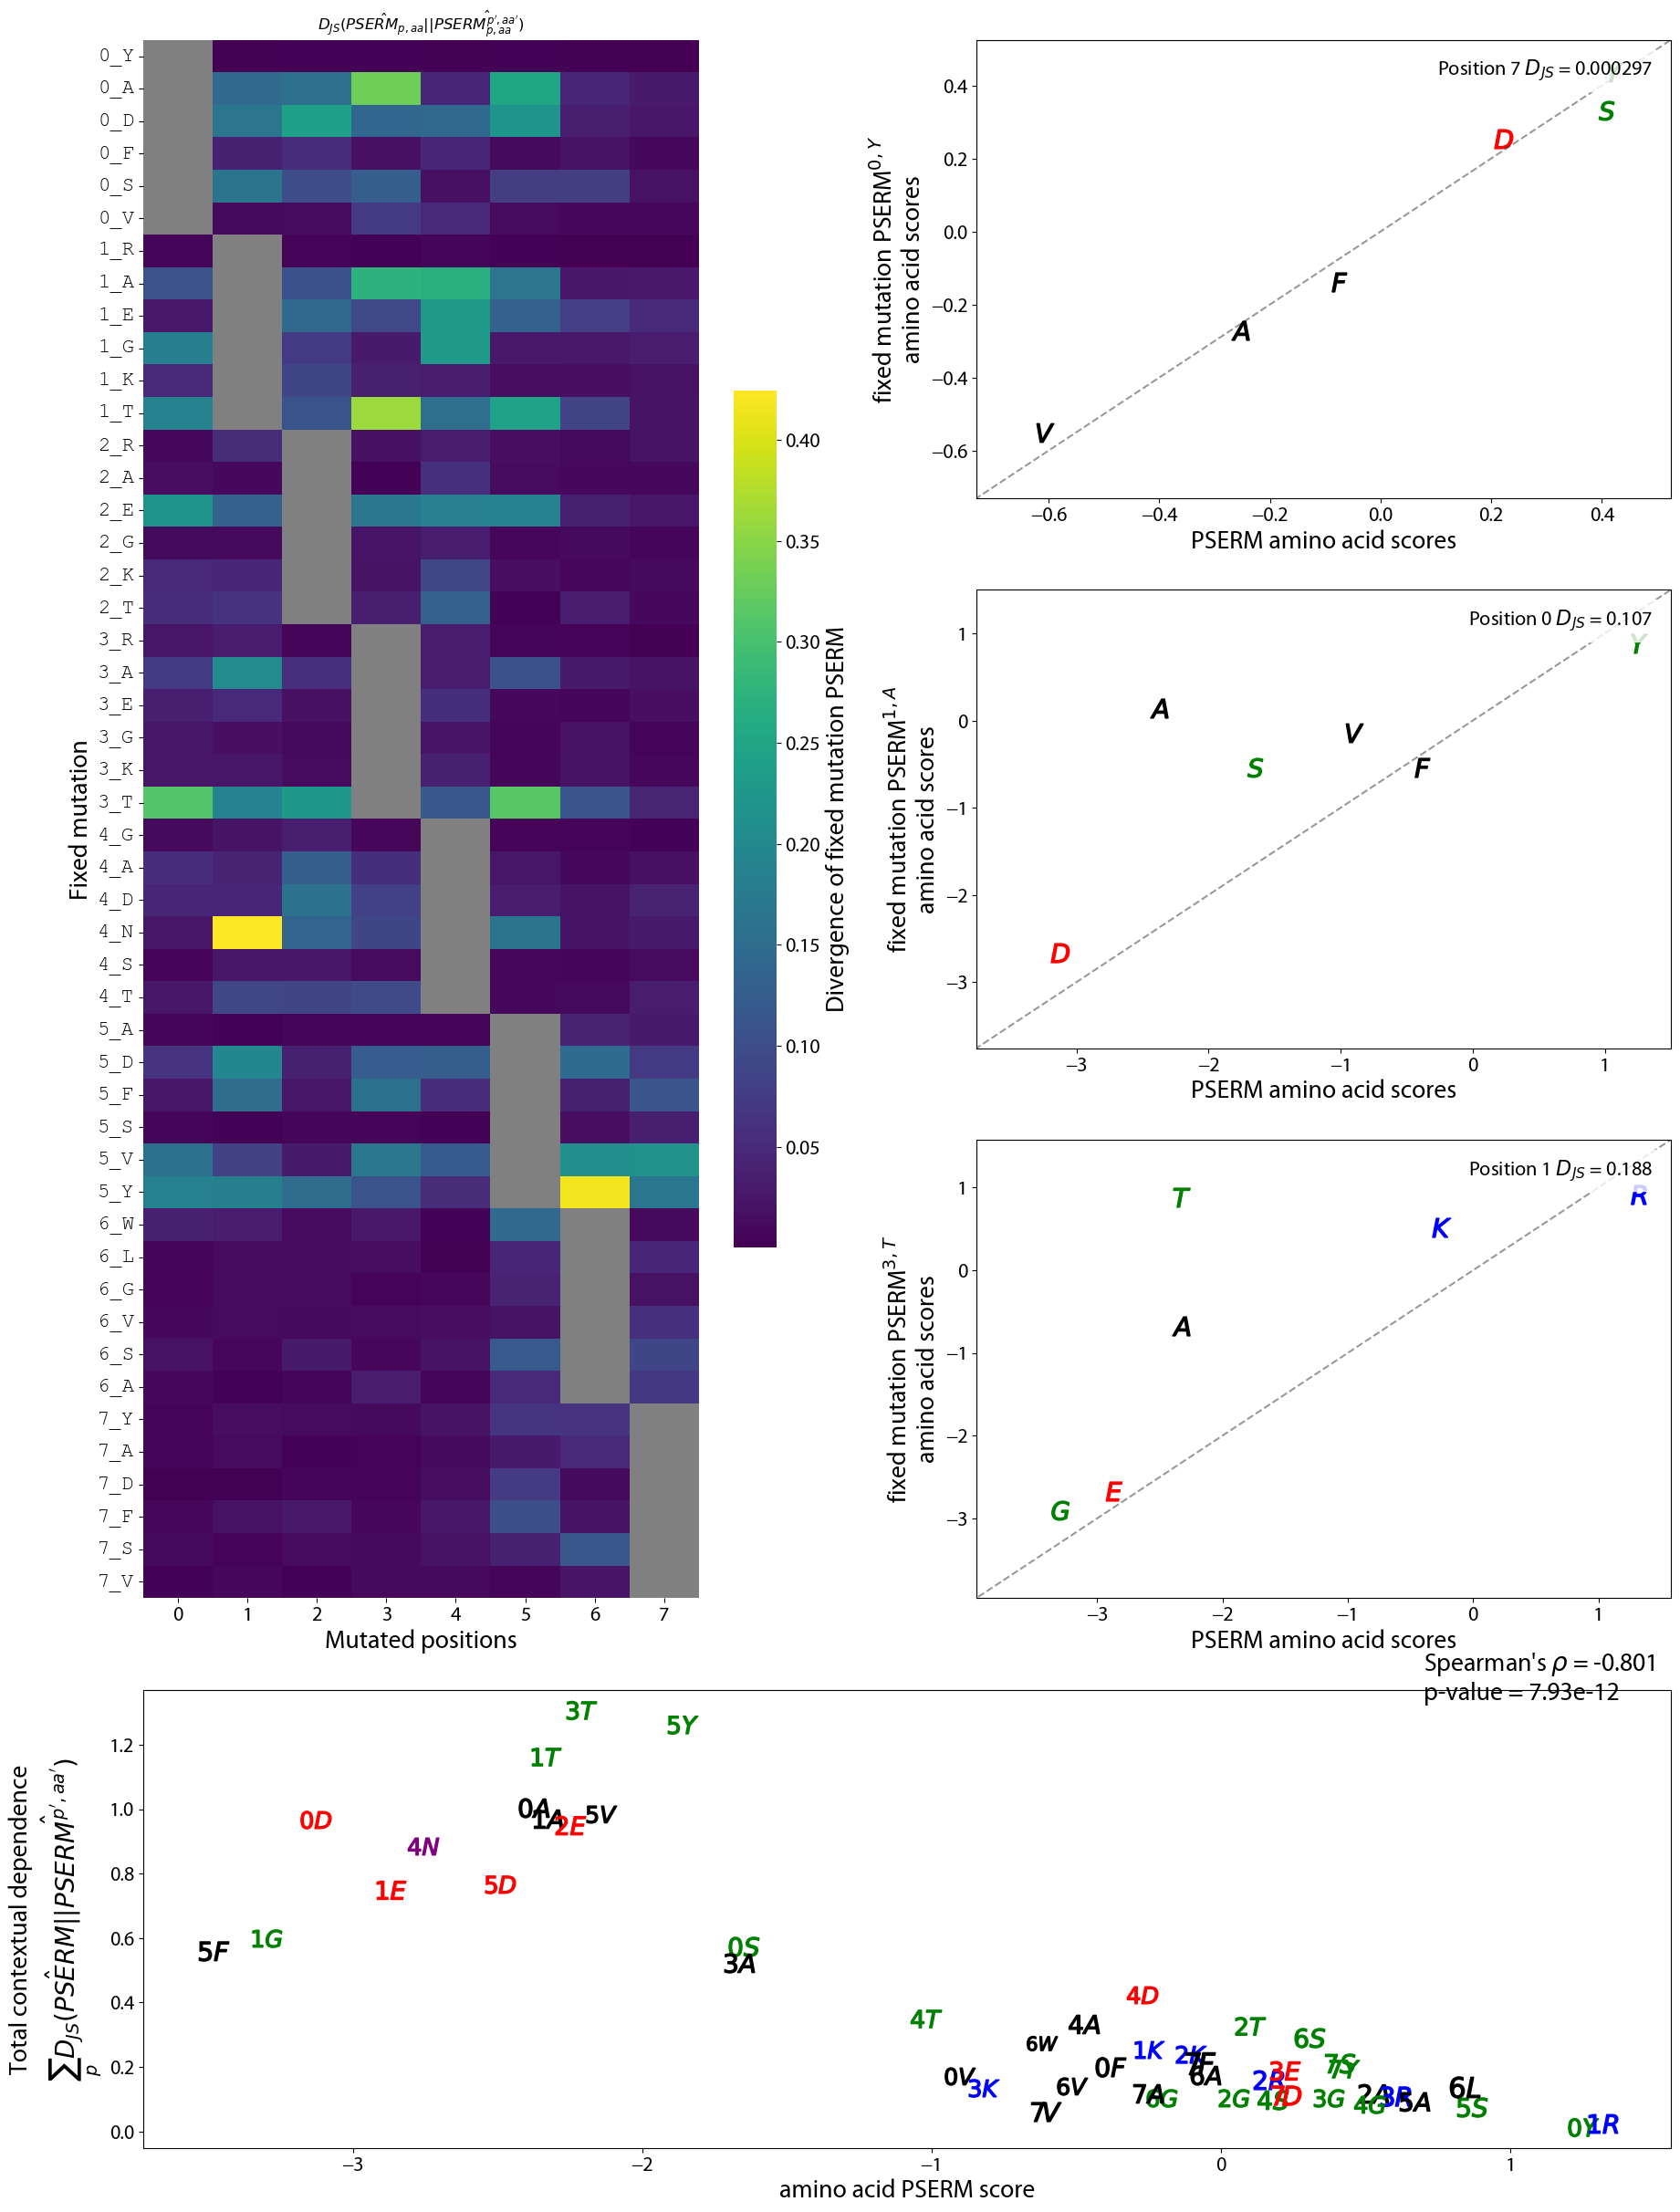

In [15]:
fig = plt.figure(figsize = (7.2 * 3, 30))
gs = matplotlib.gridspec.GridSpec(4, 2)

############# Plot Heatmap of DJS ####################
ax = fig.add_subplot(gs[0:3, 0])

ag_mask = np.zeros_like(p1_data.JS_data['Ag1_P'])
row = 0
for j in range(len(p1_data.wt)):
    for _ in range(len(p1_data.library[j])):
        ag_mask[row, j] = 1
        row += 1

sns.heatmap(p1_data.JS_data['Ag1_P'], mask = ag_mask, ax = ax, cmap = 'viridis', cbar_kws={"shrink": 0.55})
ax.set_facecolor('grey')

ax.set_xlabel('Mutated positions', fontproperties = prop)
ax.set_ylabel('Fixed mutation', fontproperties = prop)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(aaprop)
    tick.set_rotation(0)

cbar_label = r"Divergence of fixed mutation PSERM" 
ax_title = r"$\hat{D_{JS}(PSERM_{p,aa}}||\hat{PSERM^{p',aa'}_{p,aa}})$"

colorbar = ax.collections[0].colorbar
colorbar.set_label(cbar_label, fontproperties = prop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)
ax.set_title(ax_title)

################## PLOT LOW/MED/HIGH DJS scores #####################

ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 1])

plots = {
    0: [7, '0_Y', ax2, r'fixed mutation PSERM$^{0,Y}$'+'\namino acid scores'],
    1: [0, '1_A', ax3, r'fixed mutation PSERM$^{1,A}$'+'\namino acid scores'],
    2: [1, '3_T', ax4, r'fixed mutation PSERM$^{3,T}$'+'\namino acid scores']
}

for plot_data in plots.values():
    pos, seq_set_key, ax, ylabel = plot_data

    for aa in p1_data.library[pos]:
        m = f"${aa}$"
        color = chemistry[aa]
        
        ax.plot(
            p1_data.PSERM['Ag1_P'].loc[aa, pos], 
            p1_data.PSERM[f'{seq_set_key}_Ag1_P'].loc[aa, pos], 
            marker = m, markersize = 15, color = color)
    
    label = f'Position {pos} ' + r'$D_{JS}$ = '
    label += f"{p1_data.JS_data['Ag1_P'].loc[seq_set_key, pos]:.3}"
        
    ax.plot([-1000, 1000], [-1000, 1000], '--', alpha = 0.4, color = 'black', label = label)        
    
    legend = ax.legend(loc = 1, prop = tickprop, edgecolor = 'white', handlelength=0, handletextpad=0)
    for marker in legend.legendHandles:
        marker.set_visible(False)     
    
    pp = seq_set_key.split('_')[0]
    aap = seq_set_key.split('_')[1]

    ax.set_ylabel(ylabel, fontproperties = prop)
    ax.set_xlabel(f'PSERM amino acid scores', fontproperties = prop)
    
    x_min = min(p1_data.PSERM['Ag1_P'].loc[:, pos]) 
    x_max = max(p1_data.PSERM['Ag1_P'].loc[:, pos])
    y_min = min(p1_data.PSERM[f'{seq_set_key}_Ag1_P'].loc[p1_data.library[pos], pos]) 
    y_max = max(p1_data.PSERM[f'{seq_set_key}_Ag1_P'].loc[p1_data.library[pos], pos])

    mmin = min(x_min, y_min)
    mmax = max(x_max, y_max)
    #Fix this....
    #ax.text(mmin - 0.16*abs(mmin), 0.85*mmax, )
    
    ax.set_xlim(mmin - 0.2*abs(mmin), mmax + 0.2*abs(mmax))
    ax.set_ylim(mmin - 0.2*abs(mmin), mmax + 0.2*abs(mmax))

    for tick in ax.get_xticklabels():
        tick.set_fontproperties(tickprop)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(tickprop)

#################### PLOT DJS vs PSERM #################

ax5 = fig.add_subplot(gs[3::, :])
ax5.set_xlabel(r'amino acid PSERM score', fontproperties = prop)

ax5_ylabel = 'Total contextual dependence\n'
ax5_ylabel += r"$\sum_{p}{\hat{D_{JS}(PSERM}||\hat{PSERM^{p',aa'}})}$"
ax5.set_ylabel(ax5_ylabel, fontproperties = prop)
ax5.plot

x, y = [], []
for pos, aa_list in p1_data.library.items():
    for aa in aa_list:
        x.append(p1_data.PSERM['Ag1_P'].loc[aa, pos])
        y.append(((1 - ag_mask) * p1_data.JS_data['Ag1_P']).loc[f'{pos}_{aa}', :].sum())

        ax5.plot(x[-1], y[-1], color = chemistry[aa], marker = f'${pos}{aa}$', markersize = 25)
r, p = spearmanr(x, y)
corr_text = r"Spearman's $\rho$ = " + f'{r:.3}\n' + f'p-value = {p:.3}'
ax5.annotate(corr_text, (0.7, 1.34), fontproperties = prop)

for tick in ax5.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax5.get_yticklabels():
    tick.set_fontproperties(tickprop)

#plt.savefig('Fig 4. Contextual Preference.pdf')

plt.show()

# Ova + 

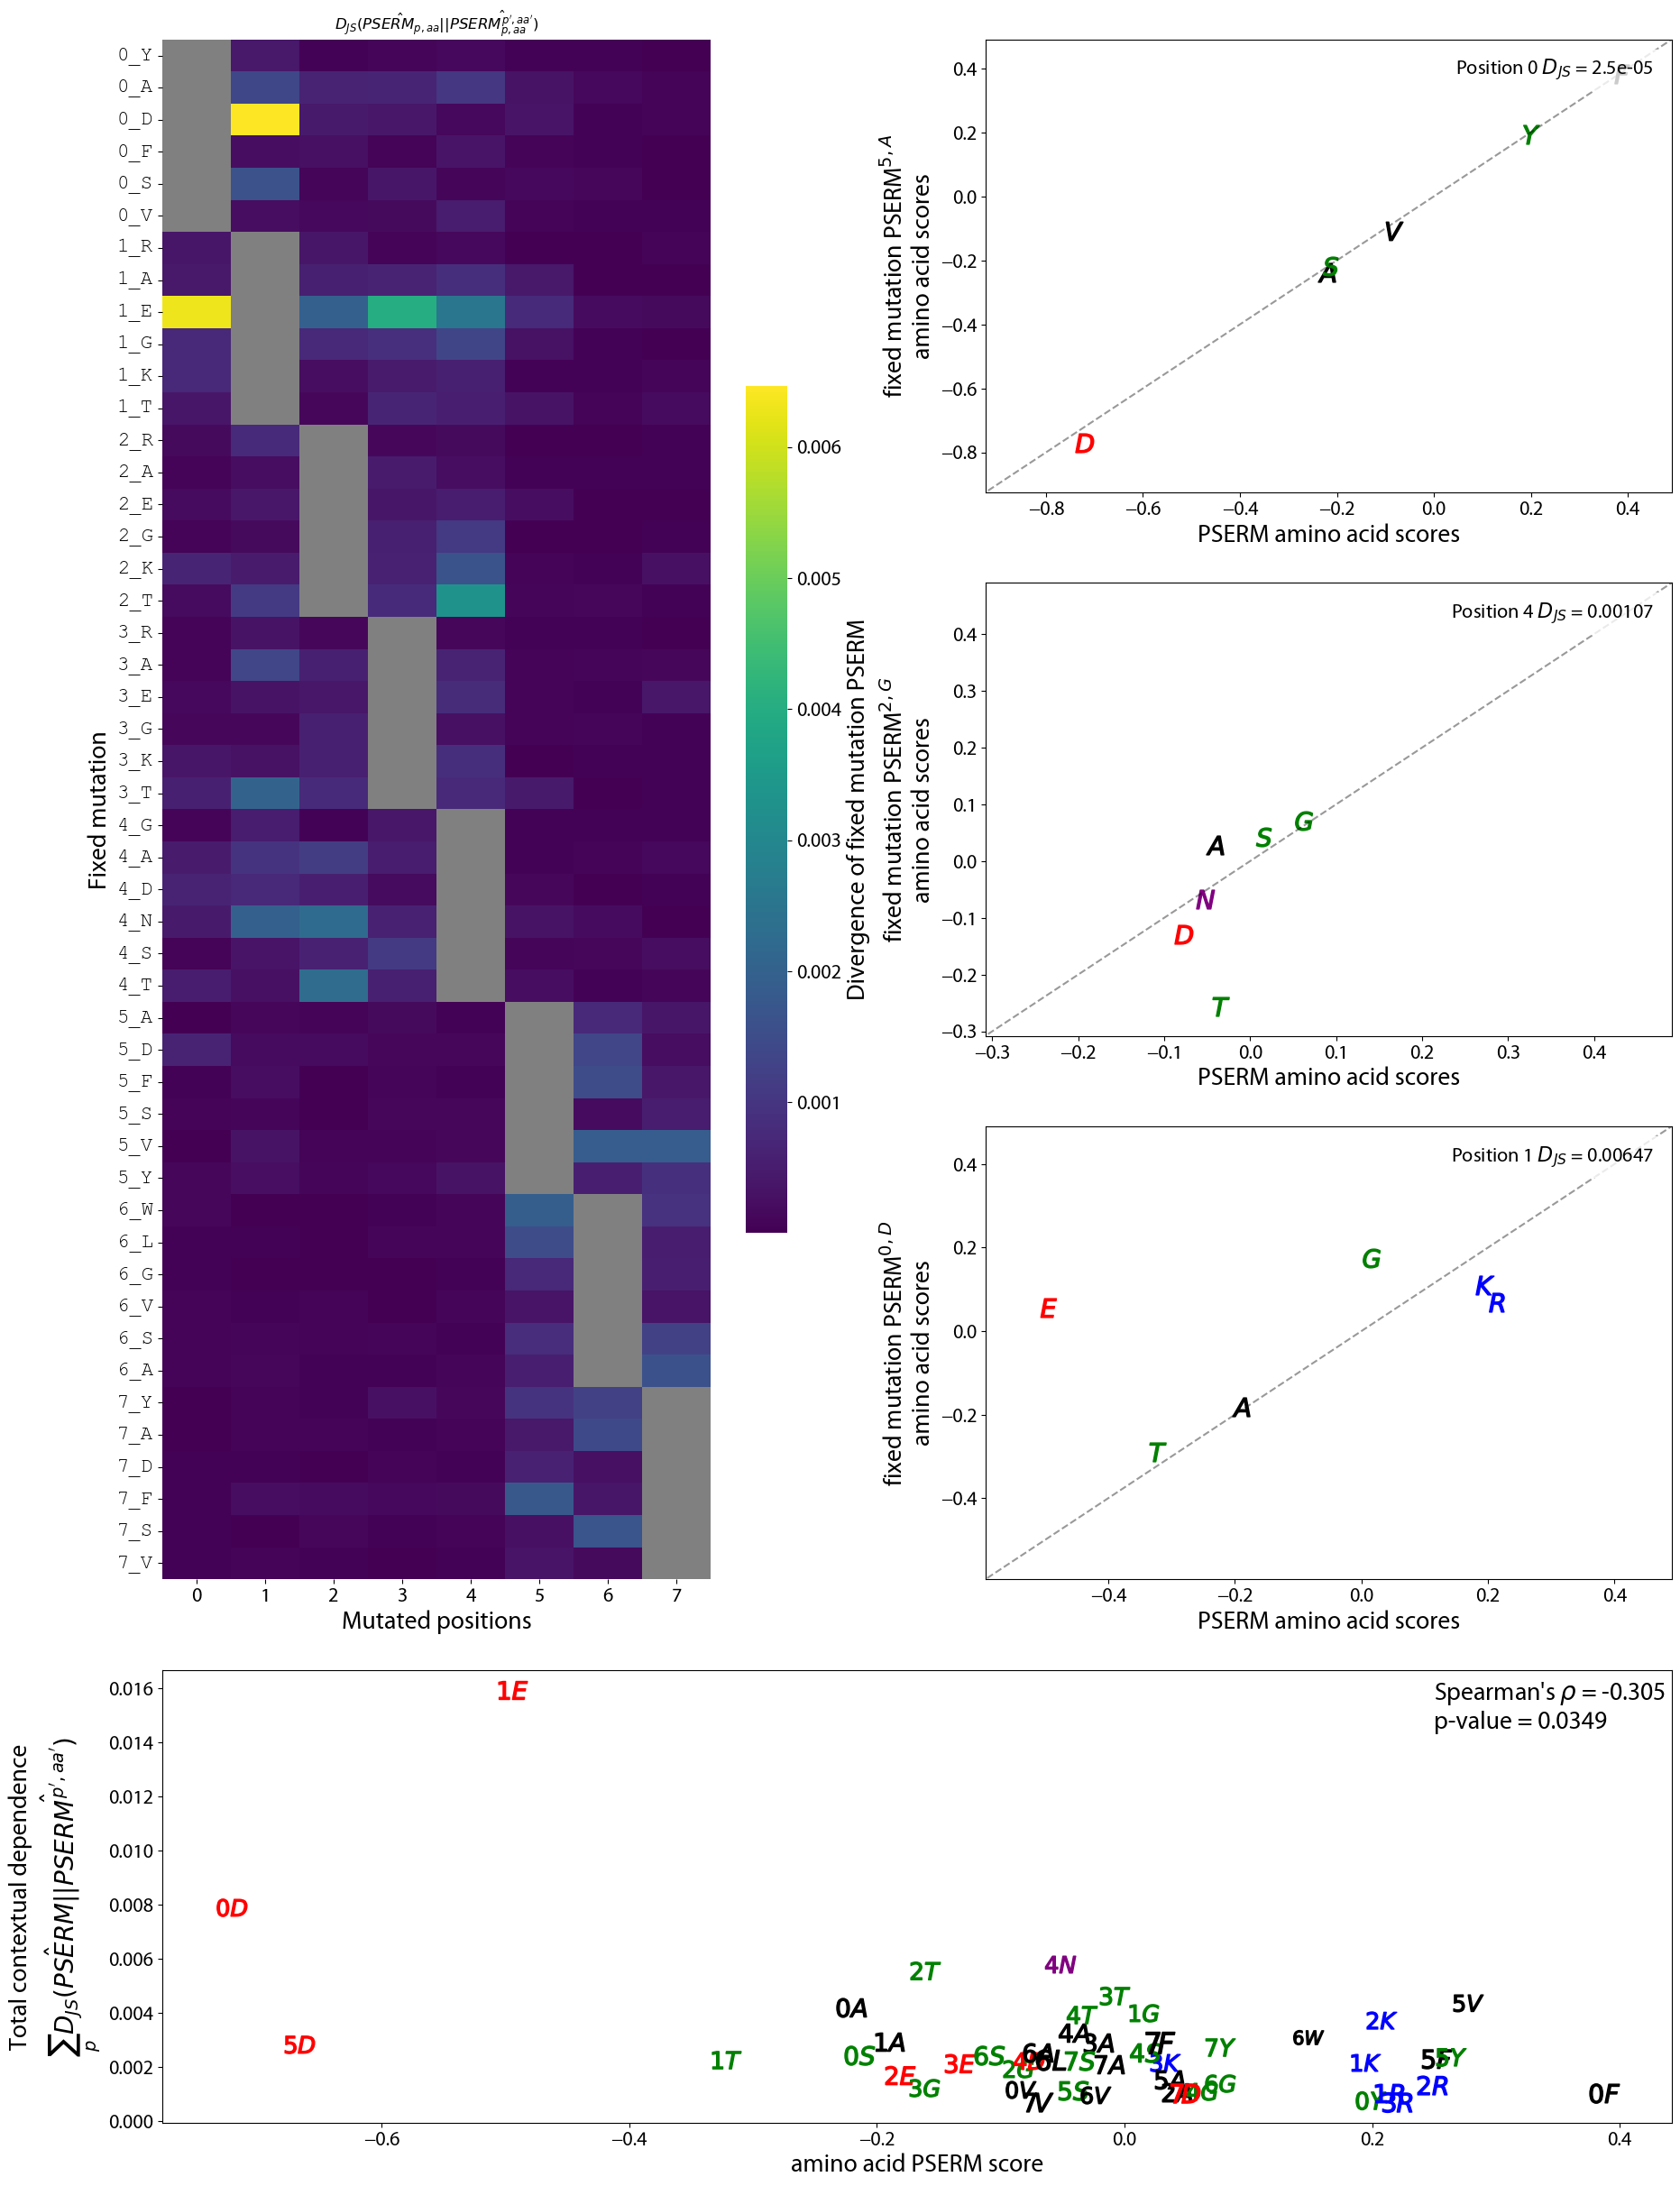

In [62]:
fig = plt.figure(figsize = (7.2 * 3, 30))
gs = matplotlib.gridspec.GridSpec(4, 2)

############# Plot Heatmap of DJS ####################
ax = fig.add_subplot(gs[0:3, 0])

ova_mask = np.zeros_like(p1_data.JS_data['Ova_P'])
row = 0
for j in range(len(p1_data.wt)):
    for _ in range(len(p1_data.library[j])):
        ova_mask[row, j] = 1
        row += 1

sns.heatmap(p1_data.JS_data['Ova_P'], mask = ova_mask, ax = ax, cmap = 'viridis', cbar_kws={"shrink": 0.55})
ax.set_facecolor('grey')

ax.set_xlabel('Mutated positions', fontproperties = prop)
ax.set_ylabel('Fixed mutation', fontproperties = prop)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(aaprop)
    tick.set_rotation(0)

cbar_label = r"Divergence of fixed mutation PSERM" 
ax_title = r"$\hat{D_{JS}(PSERM_{p,aa}}||\hat{PSERM^{p',aa'}_{p,aa}})$"

colorbar = ax.collections[0].colorbar
colorbar.set_label(cbar_label, fontproperties = prop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)
ax.set_title(ax_title)

################## PLOT LOW/MED/HIGH DJS scores #####################

ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 1])

plots = {
    0: [0, '5_A', ax2, r'fixed mutation PSERM$^{5,A}$'+'\namino acid scores'],
    1: [4, '2_G', ax3, r'fixed mutation PSERM$^{2,G}$'+'\namino acid scores'],
    2: [1, '0_D', ax4, r'fixed mutation PSERM$^{0,D}$'+'\namino acid scores']
}

for plot_data in plots.values():
    pos, seq_set_key, ax, ylabel = plot_data

    for aa in p1_data.library[pos]:
        m = f"${aa}$"
        color = chemistry[aa]
        
        ax.plot(
            p1_data.PSERM['Ova_P'].loc[aa, pos], 
            p1_data.PSERM[f'{seq_set_key}_Ova_P'].loc[aa, pos], 
            marker = m, markersize = 15, color = color)
    
    label = f'Position {pos} ' + r'$D_{JS}$ = '
    label += f"{p1_data.JS_data['Ova_P'].loc[seq_set_key, pos]:.3}"
        
    ax.plot([-1000, 1000], [-1000, 1000], '--', alpha = 0.4, color = 'black', label = label)        
    
    legend = ax.legend(loc = 1, prop = tickprop, edgecolor = 'white', handlelength=0, handletextpad=0)
    for marker in legend.legendHandles:
        marker.set_visible(False)     
    
    pp = seq_set_key.split('_')[0]
    aap = seq_set_key.split('_')[1]

    ax.set_ylabel(ylabel, fontproperties = prop)
    ax.set_xlabel(f'PSERM amino acid scores', fontproperties = prop)
    
    x_min = min(p1_data.PSERM['Ova_P'].loc[:, pos]) 
    x_max = max(p1_data.PSERM['Ova_P'].loc[:, pos])
    y_min = min(p1_data.PSERM[f'{seq_set_key}_Ova_P'].loc[p1_data.library[pos], pos]) 
    y_max = max(p1_data.PSERM[f'{seq_set_key}_Ova_P'].loc[p1_data.library[pos], pos])

    mmin = min(x_min, y_min)
    mmax = max(x_max, y_max)
    #Fix this....
    #ax.text(mmin - 0.16*abs(mmin), 0.85*mmax, )
    
    ax.set_xlim(mmin - 0.2*abs(mmin), mmax + 0.2*abs(mmax))
    ax.set_ylim(mmin - 0.2*abs(mmin), mmax + 0.2*abs(mmax))

    for tick in ax.get_xticklabels():
        tick.set_fontproperties(tickprop)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(tickprop)

#################### PLOT DJS vs PSERM #################

ax5 = fig.add_subplot(gs[3::, :])
ax5.set_xlabel(r'amino acid PSERM score', fontproperties = prop)

ax5_ylabel = 'Total contextual dependence\n'
ax5_ylabel += r"$\sum_{p}{\hat{D_{JS}(PSERM}||\hat{PSERM^{p',aa'}})}$"
ax5.set_ylabel(ax5_ylabel, fontproperties = prop)


x, y = [], []
for pos, aa_list in p1_data.library.items():
    for aa in aa_list:
        x.append(p1_data.PSERM['Ova_P'].loc[aa, pos])
        y.append(((1 - ova_mask) * p1_data.JS_data['Ova_P']).loc[f'{pos}_{aa}', :].sum())

        ax5.plot(x[-1], y[-1], color = chemistry[aa], marker = f'${pos}{aa}$', markersize = 25)
r, p = spearmanr(x, y)
corr_text = r"Spearman's $\rho$ = " + f'{r:.3}\n' + f'p-value = {p:.3}'
ax5.annotate(corr_text, (0.25, 0.0145), fontproperties = prop)

for tick in ax5.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax5.get_yticklabels():
    tick.set_fontproperties(tickprop)

#plt.savefig('Fig 4. Contextual Preference.pdf')

plt.show()

In [20]:
current_yticks[2].get_text()

'0_D'

bdat NOT subset; don't know how to subset; dropped
bloc NOT subset; don't know how to subset; dropped
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


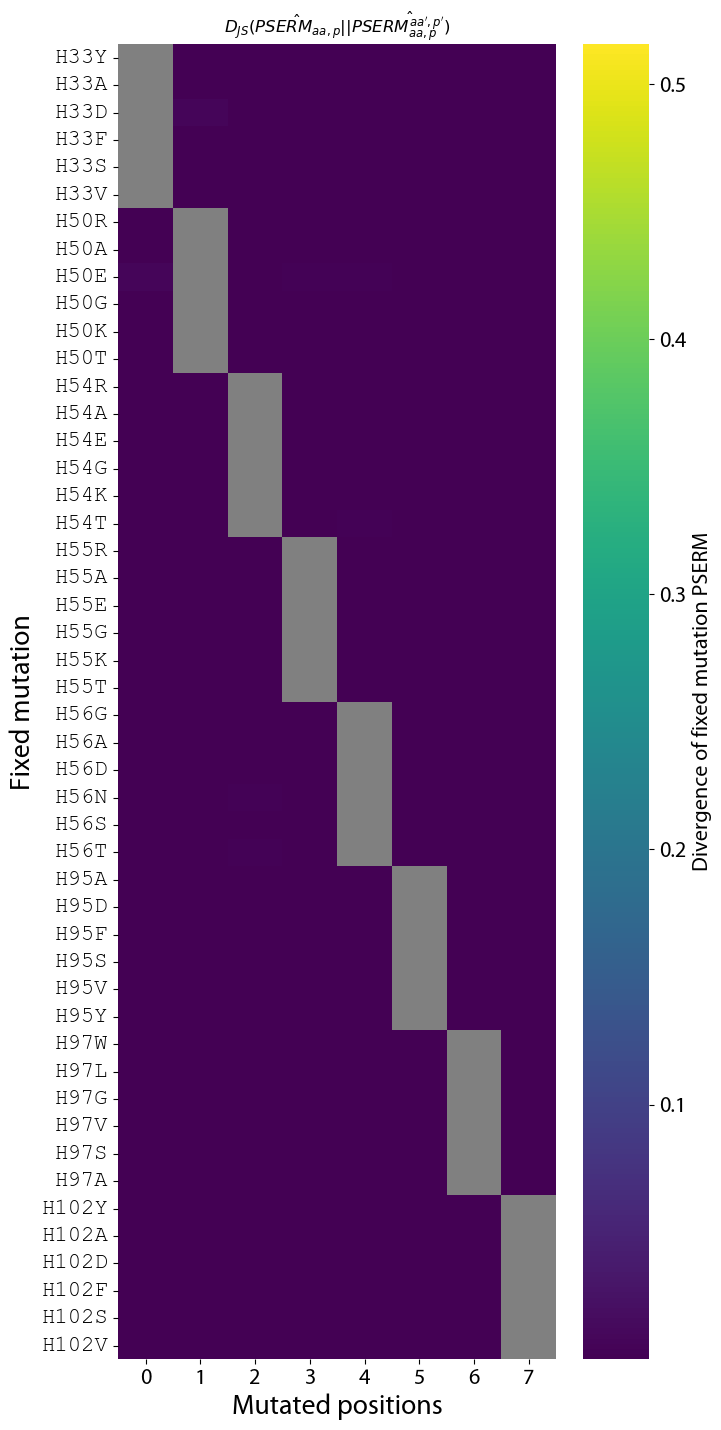

In [24]:
fig, ax = plt.subplots(figsize = (7.2 , 7.2 * 2))
############# Plot Heatmap of DJS ####################
ag_mask = np.zeros_like(p1_data.JS_data['Ova_P'])
row = 0
for j in range(len(p1_data.wt)):
    for _ in range(len(p1_data.library[j])):
        ag_mask[row, j] = 1
        row += 1

#set ylim to ag01_P min and max to show how little context matters for Ova
cmin = p1_data.JS_data['Ag01_P'].min().min()
cmax = p1_data.JS_data['Ag01_P'].max().max()

sns.heatmap(p1_data.JS_data['Ova_P'], mask = ag_mask, ax = ax, cmap = 'viridis', vmin = cmin, vmax = cmax)
ax.set_facecolor('grey')

mutated_pos = ['H33', 'H50', 'H54', 'H55', 'H56', 'H95', 'H97', 'H102']

current_yticks = ax.get_yticklabels()
new_yticks = [
    f"{mutated_pos[int(t.get_text().split('_')[0])]}{t.get_text().split('_')[1]}" for t in current_yticks]

ax.set_xlabel('Mutated positions', fontproperties = prop)
ax.set_ylabel('Fixed mutation', fontproperties = prop)
ax.set_yticklabels(new_yticks)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(aaprop)
    tick.set_rotation(0)

cbar_label = r"Divergence of fixed mutation PSERM" 
ax_title = r"$\hat{D_{JS}(PSERM_{aa,p}}||\hat{PSERM^{aa',p'}_{aa,p}})$"

colorbar = ax.collections[0].colorbar
colorbar.set_label(cbar_label, fontproperties = tickprop)

for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)
ax.set_title(ax_title)

plt.tight_layout()
plt.savefig('Fig S3 All mutations Ova JS divergence.pdf')
plt.show()

# PSR +

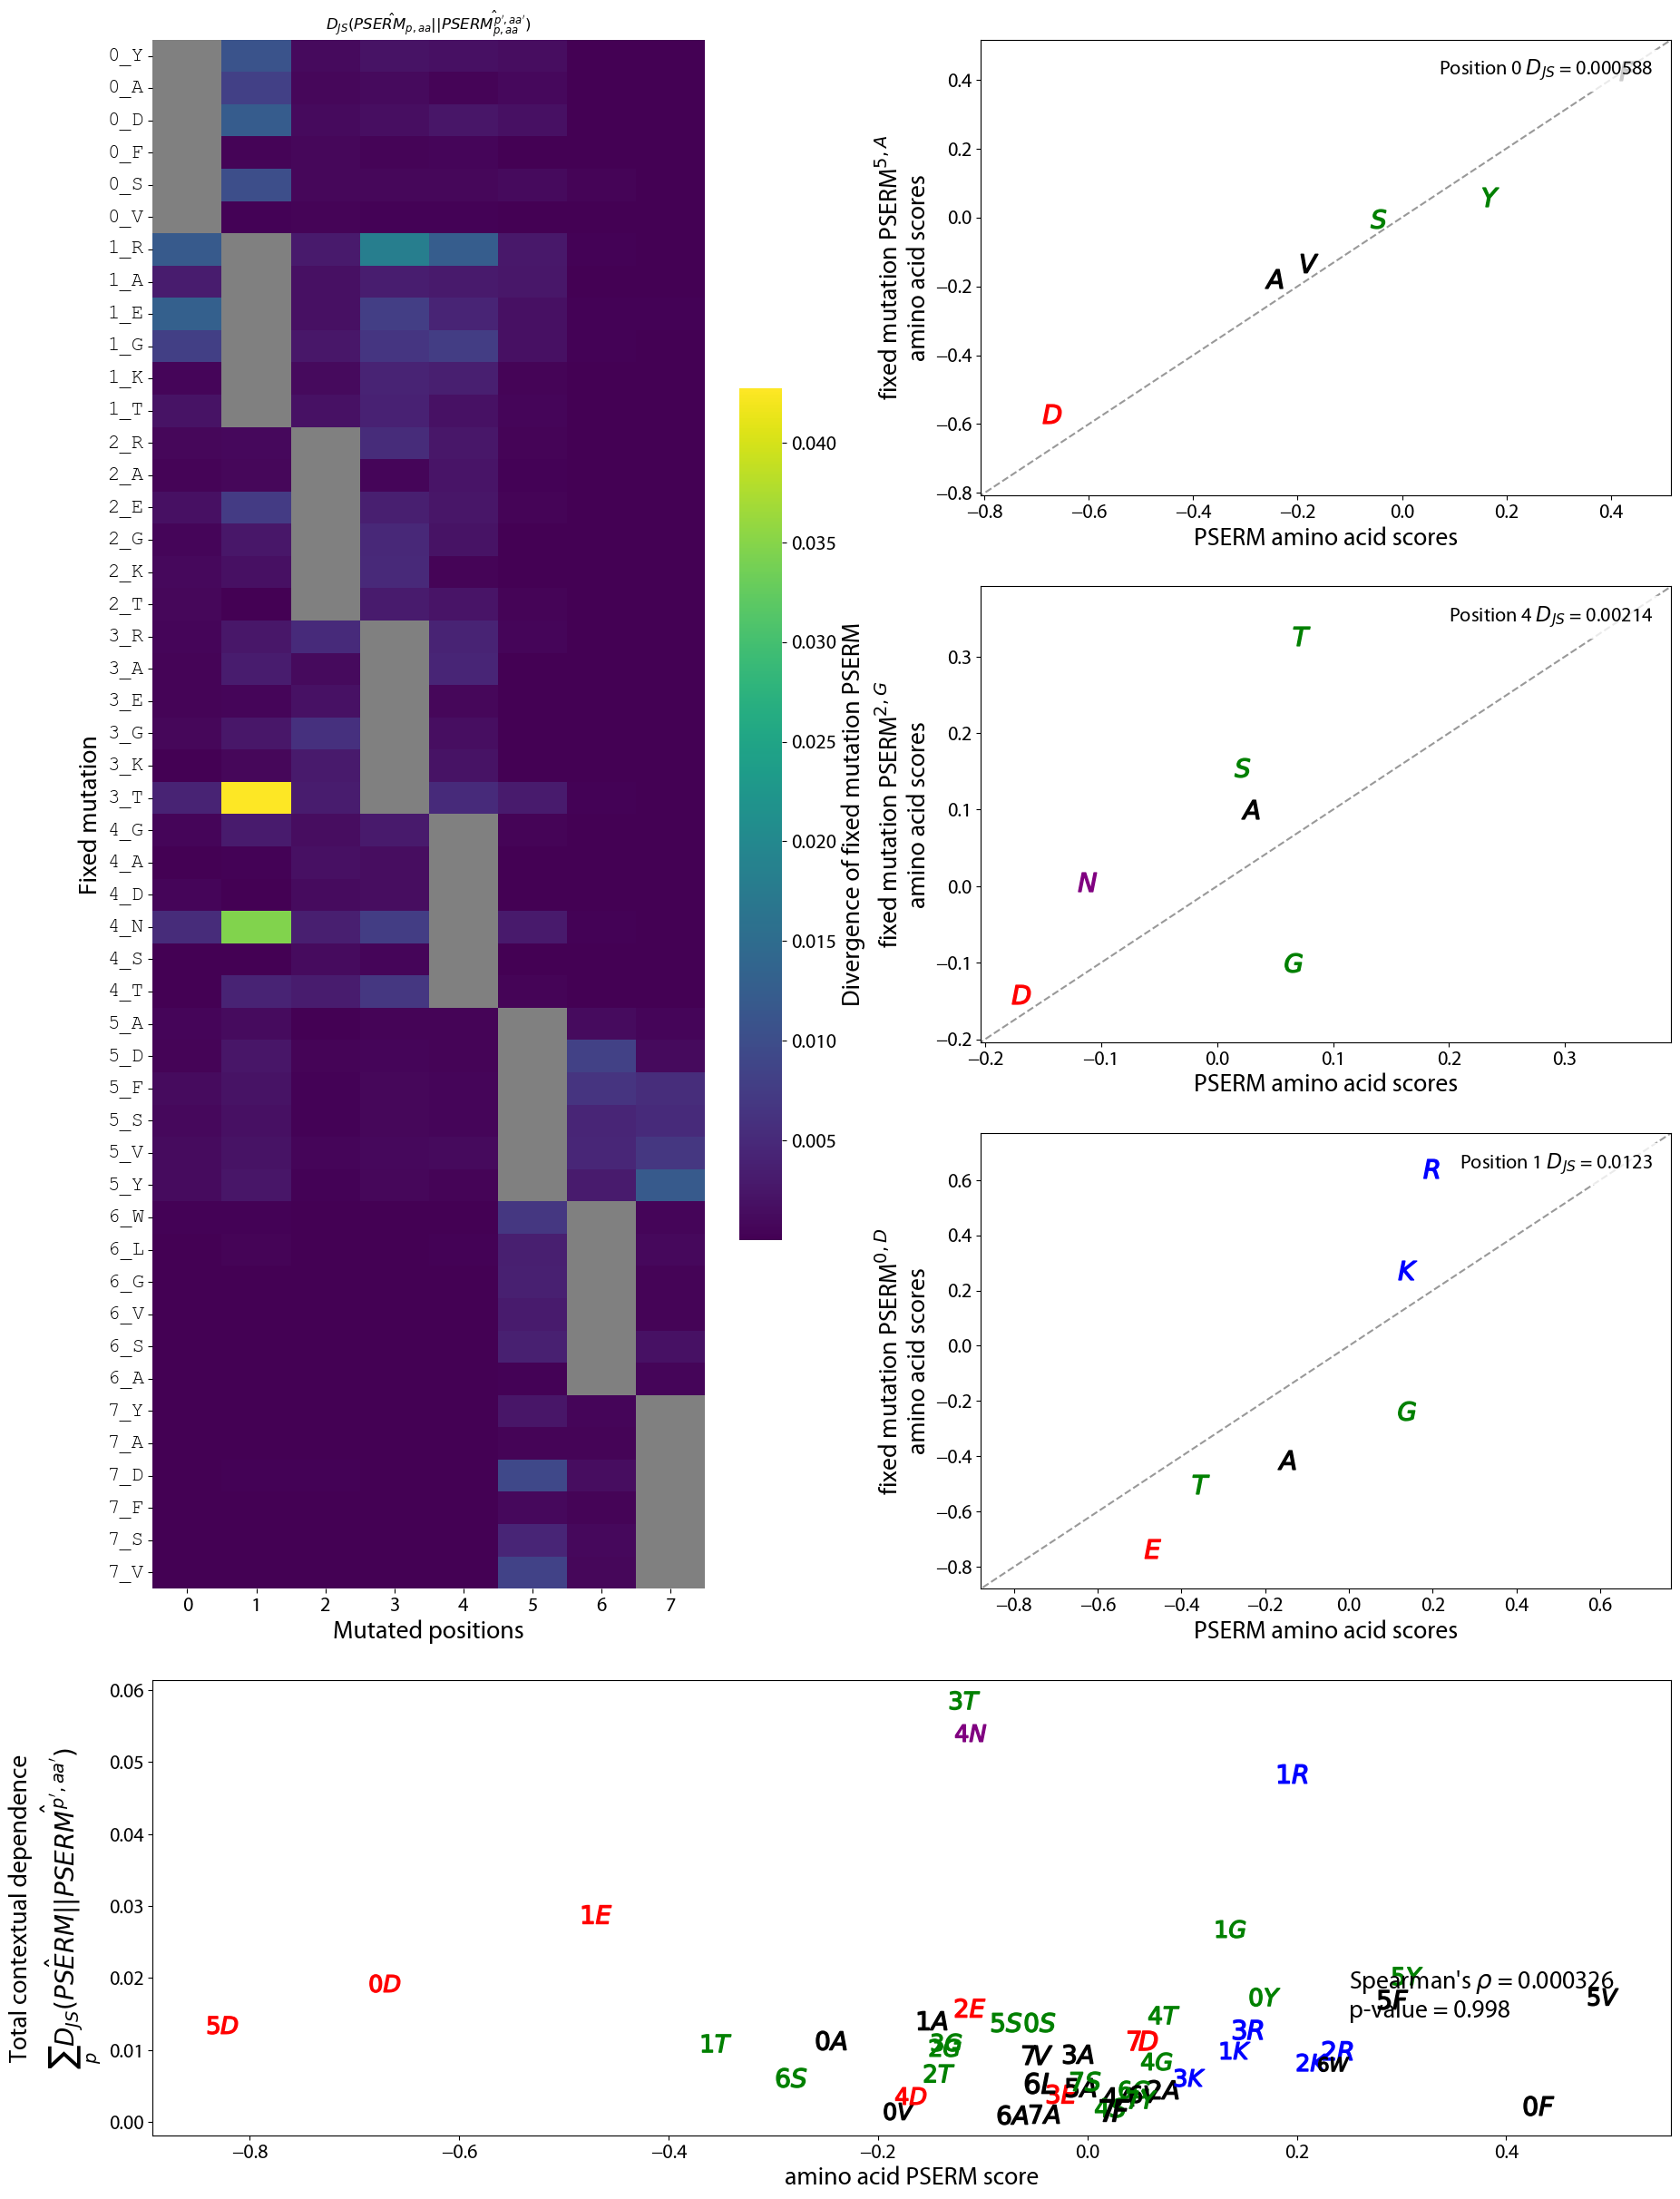

In [7]:
fig = plt.figure(figsize = (7.2 * 3, 30))
gs = matplotlib.gridspec.GridSpec(4, 2)

############# Plot Heatmap of DJS ####################
ax = fig.add_subplot(gs[0:3, 0])

ova_mask = np.zeros_like(p1_data.JS_data['PSR_P'])
row = 0
for j in range(len(p1_data.wt)):
    for _ in range(len(p1_data.library[j])):
        ova_mask[row, j] = 1
        row += 1

sns.heatmap(p1_data.JS_data['PSR_P'], mask = ova_mask, ax = ax, cmap = 'viridis', cbar_kws={"shrink": 0.55})
ax.set_facecolor('grey')

ax.set_xlabel('Mutated positions', fontproperties = prop)
ax.set_ylabel('Fixed mutation', fontproperties = prop)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(aaprop)
    tick.set_rotation(0)

cbar_label = r"Divergence of fixed mutation PSERM" 
ax_title = r"$\hat{D_{JS}(PSERM_{p,aa}}||\hat{PSERM^{p',aa'}_{p,aa}})$"

colorbar = ax.collections[0].colorbar
colorbar.set_label(cbar_label, fontproperties = prop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)
ax.set_title(ax_title)

################## PLOT LOW/MED/HIGH DJS scores #####################

ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 1])

plots = {
    0: [0, '5_A', ax2, r'fixed mutation PSERM$^{5,A}$'+'\namino acid scores'],
    1: [4, '2_G', ax3, r'fixed mutation PSERM$^{2,G}$'+'\namino acid scores'],
    2: [1, '0_D', ax4, r'fixed mutation PSERM$^{0,D}$'+'\namino acid scores']
}

for plot_data in plots.values():
    pos, seq_set_key, ax, ylabel = plot_data

    for aa in p1_data.library[pos]:
        m = f"${aa}$"
        color = chemistry[aa]
        
        ax.plot(
            p1_data.PSERM['PSR_P'].loc[aa, pos], 
            p1_data.PSERM[f'{seq_set_key}_PSR_P'].loc[aa, pos], 
            marker = m, markersize = 15, color = color)
    
    label = f'Position {pos} ' + r'$D_{JS}$ = '
    label += f"{p1_data.JS_data['PSR_P'].loc[seq_set_key, pos]:.3}"
        
    ax.plot([-1000, 1000], [-1000, 1000], '--', alpha = 0.4, color = 'black', label = label)        
    
    legend = ax.legend(loc = 1, prop = tickprop, edgecolor = 'white', handlelength=0, handletextpad=0)
    for marker in legend.legendHandles:
        marker.set_visible(False)     
    
    pp = seq_set_key.split('_')[0]
    aap = seq_set_key.split('_')[1]

    ax.set_ylabel(ylabel, fontproperties = prop)
    ax.set_xlabel(f'PSERM amino acid scores', fontproperties = prop)
    
    x_min = min(p1_data.PSERM['PSR_P'].loc[:, pos]) 
    x_max = max(p1_data.PSERM['PSR_P'].loc[:, pos])
    y_min = min(p1_data.PSERM[f'{seq_set_key}_PSR_P'].loc[p1_data.library[pos], pos]) 
    y_max = max(p1_data.PSERM[f'{seq_set_key}_PSR_P'].loc[p1_data.library[pos], pos])

    mmin = min(x_min, y_min)
    mmax = max(x_max, y_max)
    #Fix this....
    #ax.text(mmin - 0.16*abs(mmin), 0.85*mmax, )
    
    ax.set_xlim(mmin - 0.2*abs(mmin), mmax + 0.2*abs(mmax))
    ax.set_ylim(mmin - 0.2*abs(mmin), mmax + 0.2*abs(mmax))

    for tick in ax.get_xticklabels():
        tick.set_fontproperties(tickprop)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(tickprop)

#################### PLOT DJS vs PSERM #################

ax5 = fig.add_subplot(gs[3::, :])
ax5.set_xlabel(r'amino acid PSERM score', fontproperties = prop)

ax5_ylabel = 'Total contextual dependence\n'
ax5_ylabel += r"$\sum_{p}{\hat{D_{JS}(PSERM}||\hat{PSERM^{p',aa'}})}$"
ax5.set_ylabel(ax5_ylabel, fontproperties = prop)
ax5.plot

x, y = [], []
for pos, aa_list in p1_data.library.items():
    for aa in aa_list:
        x.append(p1_data.PSERM['PSR_P'].loc[aa, pos])
        y.append(((1 - ova_mask) * p1_data.JS_data['PSR_P']).loc[f'{pos}_{aa}', :].sum())

        ax5.plot(x[-1], y[-1], color = chemistry[aa], marker = f'${pos}{aa}$', markersize = 25)
r, p = spearmanr(x, y)
corr_text = r"Spearman's $\rho$ = " + f'{r:.3}\n' + f'p-value = {p:.3}'
ax5.annotate(corr_text, (0.25, 0.0145), fontproperties = prop)

for tick in ax5.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax5.get_yticklabels():
    tick.set_fontproperties(tickprop)

#plt.savefig('Fig 4. Contextual Preference.pdf')

plt.show()

# Project 2 

In [11]:
# Project 2 NGS_round_data setups
p2_wt = 'IDDLYPYWYG'

p2_muts_no_wt = {
    0: ['V'],
    1: ['F', 'K', 'R', 'P', 'Y'],
    2: ['T', 'H', 'K', 'N', 'Y'],
    3: ['R', 'S', 'G'],
    4: ['K'],
    5: ['R', 'G'],
    6: ['K', 'R', 'D', 'E', 'H'],
    7: ['K', 'A', 'D', 'E', 'H'],
    8: ['S', 'Q', 'D', 'E'],
    9: ['A', 'S', 'T', 'K']
}

p2_r1 = NGS_round_data(
    Round = 1, 
    sequence_type = 'mutations', 
    samples = ['Input', 'AgP', 'AgN', 'QDP', 'QDN', 'EP', 'EN'], 
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_2/Rep_1/VH/', 
    wild_type = p2_wt,
    mutations_dict = p2_muts_no_wt
)

p2_r2 = NGS_round_data(
    Round = 1, 
    sequence_type = 'mutations', 
    samples = ['Input', 'AgP', 'AgN', 'QDP', 'QDN', 'EP', 'EN'], 
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_2/Rep_2/VH/', 
    wild_type = p2_wt,
    mutations_dict = p2_muts_no_wt
)

p2_clone_set_trimmed_r1 = generate_clone_set(p2_r1, ['Input', 'AgP', 'AgN', 'QDP', 'QDN', 'EP', 'EN'])
p2_clone_set_trimmed_r2 = generate_clone_set(p2_r2, ['Input', 'AgP', 'AgN', 'QDP', 'QDN', 'EP', 'EN'])
p2_clone_set_trimmed = list(set(p2_clone_set_trimmed_r1).union(set(p2_clone_set_trimmed_r2)))

p2_data = ngs_analysis([p2_r1, p2_r2], ['Input', 'AgP', 'AgN', 'QDP', 'QDN', 'EP', 'EN'], clone_set = p2_clone_set_trimmed)

p2_data.generate_D()

for pssm in glob.glob('../Project_PSSMs/Project_2/*.xlsx'):
    p2_data.load_pssm(pssm.split('.xlsx')[0].split('/')[-1], pssm, excel_or_csv = 'excel')

for ppm in glob.glob('../Project_PPMs/Project_2/*.xlsx'):    
    p2_data.load_ppm(ppm.split('.xlsx')[0].split('/')[-1], ppm, excel_or_csv = 'excel')

for sample in p2_data.samples:
    if sample != 'Input':
        p2_data.generate_PSERM(In_sample = 'Input', Out_sample = sample)


['Mutation_1001.csv', 'Mutation_1002.csv', 'Mutation_1003.csv', 'Mutation_1004.csv', 'Mutation_1005.csv', 'Mutation_1006.csv', 'Mutation_1007.csv']
['Mutation_1001.csv', 'Mutation_1002.csv', 'Mutation_1003.csv', 'Mutation_1004.csv', 'Mutation_1005.csv', 'Mutation_1006.csv', 'Mutation_1007.csv']


100%|██████████| 2360974/2360974 [00:04<00:00, 492472.76it/s]


In [58]:
for pos, aalist in tqdm.tqdm(p2_data.library.items()):
    for aa in aalist:
        #p2_data.generate_fixed_resi_PSSM('Input', pos, aa)
        #p2_data.generate_fixed_resi_PSSM('AgP', pos, aa)
        #p2_data.generate_fixed_resi_PSSM('AgN', pos, aa)
        #p2_data.generate_fixed_resi_PSSM('QDP', pos, aa)
        #p2_data.generate_fixed_resi_PSSM('QDN', pos, aa)
        #p2_data.generate_fixed_resi_PSSM('EP', pos, aa)
        #p2_data.generate_fixed_resi_PSSM('EN', pos, aa)

        #p2_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_AgP')
        p2_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_QDP')
        #p2_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_EP')
        p2_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_AgN')
        #p2_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_QDN')
        p2_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_EN')

100%|██████████| 10/10 [00:00<00:00, 275.39it/s]


In [25]:
for pos, aalist in p2_data.library.items():
    for aa in aalist:
        p2_data.PSSM[f'{pos}_{aa}_Input'].to_excel(f'../Project_PSSMs/Project_2/Fixed_Residue_PSSM/{pos}_{aa}_Input.xlsx')
        p2_data.PSSM[f'{pos}_{aa}_AgP'].to_excel(f'../Project_PSSMs/Project_2/Fixed_Residue_PSSM/{pos}_{aa}_AgP.xlsx')
        p2_data.PSSM[f'{pos}_{aa}_QDP'].to_excel(f'../Project_PSSMs/Project_2/Fixed_Residue_PSSM/{pos}_{aa}_QDP.xlsx')
        p2_data.PSSM[f'{pos}_{aa}_EP'].to_excel(f'../Project_PSSMs/Project_2/Fixed_Residue_PSSM/{pos}_{aa}_EP.xlsx')
        p2_data.PSSM[f'{pos}_{aa}_AgN'].to_excel(f'../Project_PSSMs/Project_2/Fixed_Residue_PSSM/{pos}_{aa}_AgN.xlsx')
        p2_data.PSSM[f'{pos}_{aa}_QDN'].to_excel(f'../Project_PSSMs/Project_2/Fixed_Residue_PSSM/{pos}_{aa}_QDN.xlsx')
        p2_data.PSSM[f'{pos}_{aa}_EN'].to_excel(f'../Project_PSSMs/Project_2/Fixed_Residue_PSSM/{pos}_{aa}_EN.xlsx')

In [59]:
#p2_data.get_all_mut_JS_divergence_matrix('AgP')
#p2_data.get_all_mut_JS_divergence_matrix('AgN')
#p2_data.get_all_mut_JS_divergence_matrix('QDP')
#p2_data.get_all_mut_JS_divergence_matrix('QDN')
#p2_data.get_all_mut_JS_divergence_matrix('EP')
p2_data.get_all_mut_JS_divergence_matrix('EN')

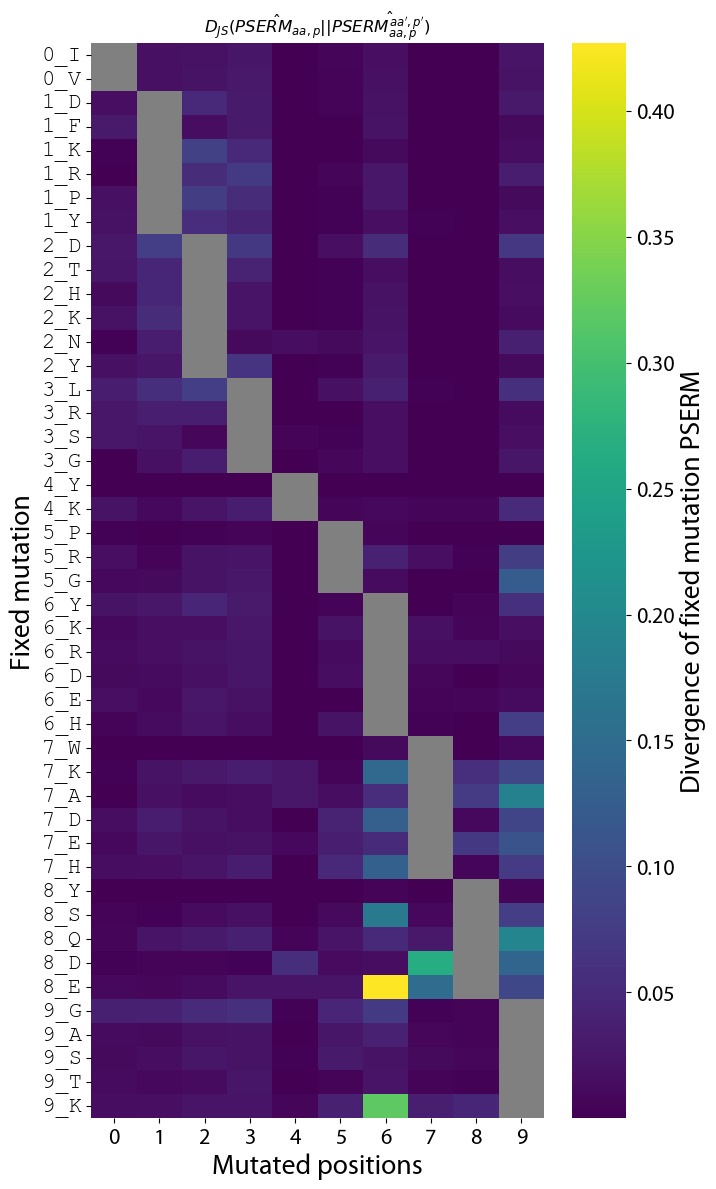

In [19]:
fig, ax = plt.subplots(figsize = (7.2 , 12))
############# Plot Heatmap of DJS ####################
ag_mask = np.zeros_like(p2_data.JS_data['AgP'])
row = 0
for j in range(len(p2_data.wt)):
    for _ in range(len(p2_data.library[j])):
        ag_mask[row, j] = 1
        row += 1

sns.heatmap(p2_data.JS_data['AgP'], mask = ag_mask, ax = ax, cmap = 'viridis')#, cbar_kws={"shrink": 0.55})
ax.set_facecolor('grey')

ax.set_xlabel('Mutated positions', fontproperties = prop)
ax.set_ylabel('Fixed mutation', fontproperties = prop)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(aaprop)
    tick.set_rotation(0)

cbar_label = r"Divergence of fixed mutation PSERM" 
ax_title = r"$\hat{D_{JS}(PSERM_{aa,p}}||\hat{PSERM^{aa',p'}_{aa,p}})$"

colorbar = ax.collections[0].colorbar
colorbar.set_label(cbar_label, fontproperties = prop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)
ax.set_title(ax_title)

plt.tight_layout()
#plt.savefig('Fig S2 All mutations Ag JS divergence.pdf')
plt.show()

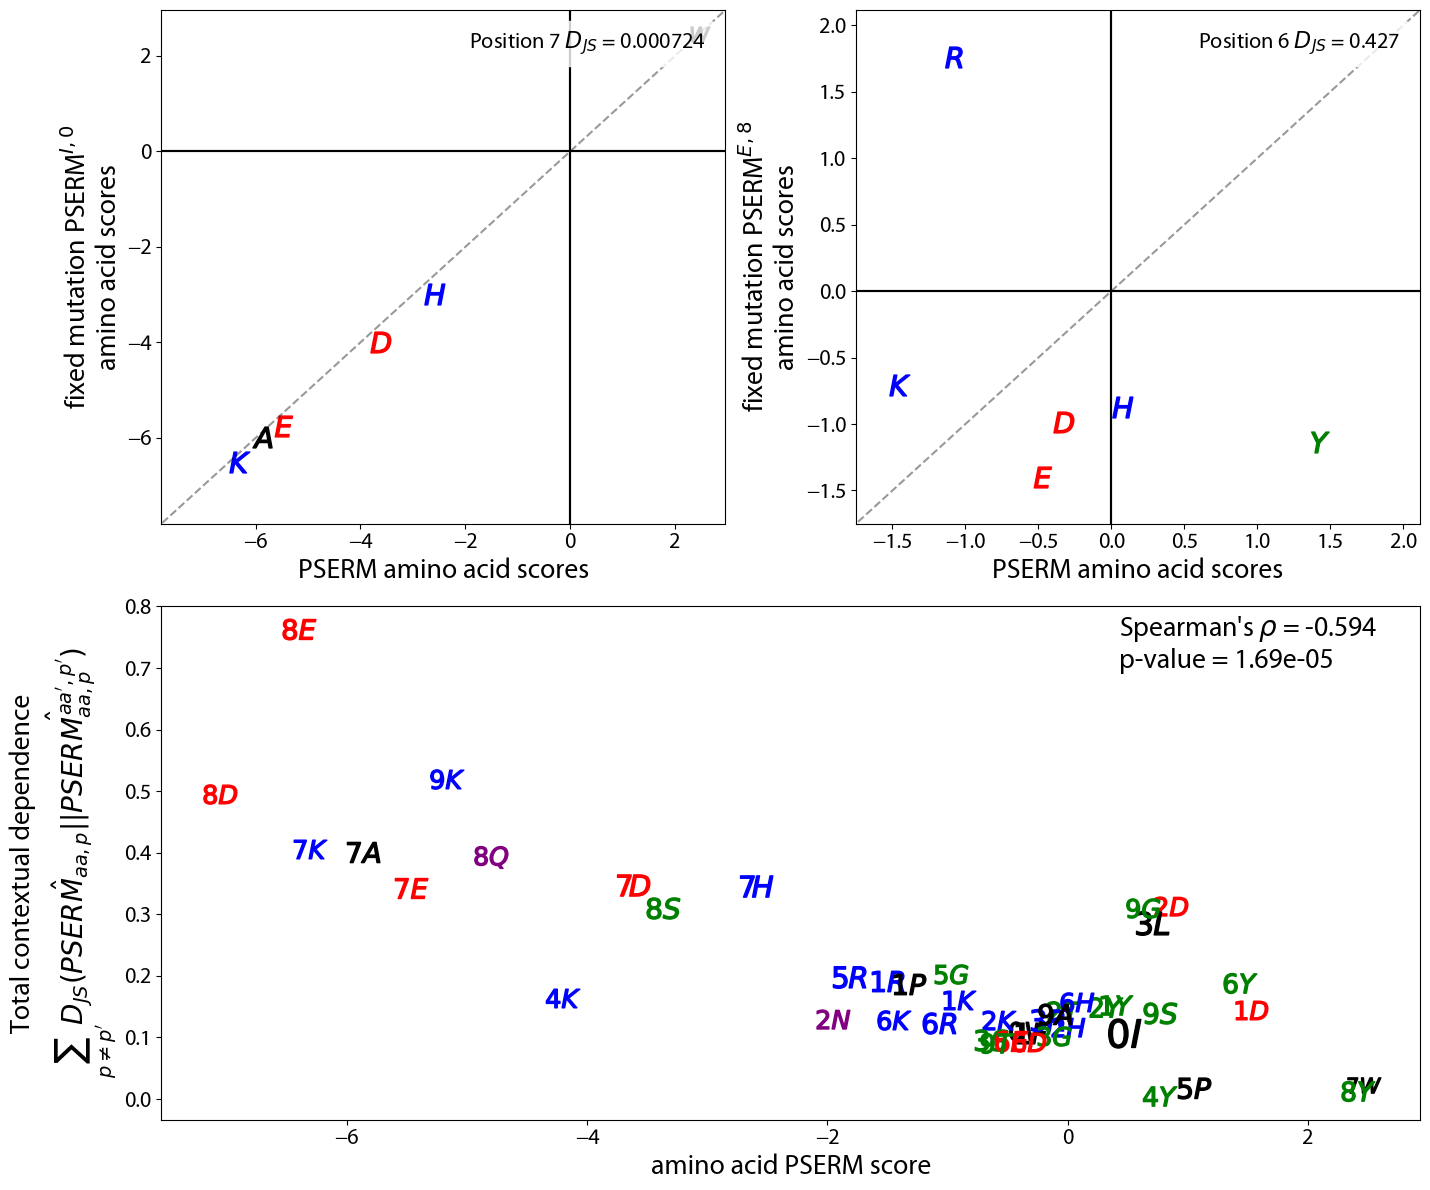

In [24]:
fig = plt.figure(figsize = (7.2 * 2, 12))
gs = matplotlib.gridspec.GridSpec(2, 2)

################## PLOT LOW/HIGH DJS scores #####################

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

plots = {
    0: [7, '0_I', ax1, r'fixed mutation PSERM$^{I,0}$'+'\namino acid scores'],
    1: [6, '8_E', ax2, r'fixed mutation PSERM$^{E,8}$'+'\namino acid scores']
}

for plot_data in plots.values(): 
    pos, seq_set_key, ax, ylabel = plot_data
    ax.hlines([0, 0], -100, 100, color = 'k')
    ax.vlines([0, 0], -100, 100, color = 'k')

    for aa in p2_data.library[pos]:
        m = f"${aa}$"
        color = chemistry[aa]
        
        ax.plot(
            p2_data.PSERM['AgP'].loc[aa, pos], 
            p2_data.PSERM[f'{seq_set_key}_AgP'].loc[aa, pos], 
            marker = m, markersize = 15, color = color)
    
    label = f'Position {pos} ' + r'$D_{JS}$ = '
    label += f"{p2_data.JS_data['AgP'].loc[seq_set_key, pos]:.3}"
        
    ax.plot([-1000, 1000], [-1000, 1000], '--', alpha = 0.4, color = 'black', label = label)        
    
    legend = ax.legend(loc = 1, prop = tickprop, edgecolor = 'white', handlelength=0, handletextpad=0)
    for marker in legend.legendHandles:
        marker.set_visible(False)     
    
    pp = seq_set_key.split('_')[0]
    aap = seq_set_key.split('_')[1]

    ax.set_ylabel(ylabel, fontproperties = prop)
    ax.set_xlabel(f'PSERM amino acid scores', fontproperties = prop)
    
    x_min = min(p2_data.PSERM['AgP'].loc[:, pos]) 
    x_max = max(p2_data.PSERM['AgP'].loc[:, pos])
    y_min = min(p2_data.PSERM[f'{seq_set_key}_AgP'].loc[p2_data.library[pos], pos]) 
    y_max = max(p2_data.PSERM[f'{seq_set_key}_AgP'].loc[p2_data.library[pos], pos])

    mmin = min(x_min, y_min)
    mmax = max(x_max, y_max)
    #Fix this....
    #ax.text(mmin - 0.16*abs(mmin), 0.85*mmax, )
    
    ax.set_xlim(mmin - 0.2*abs(mmin), mmax + 0.2*abs(mmax))
    ax.set_ylim(mmin - 0.2*abs(mmin), mmax + 0.2*abs(mmax))

    for tick in ax.get_xticklabels():
        tick.set_fontproperties(tickprop)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(tickprop)

#################### PLOT DJS vs PSERM #################

ax3 = fig.add_subplot(gs[1::, :])
ax3.set_xlabel(r'amino acid PSERM score', fontproperties = prop)

ax3_ylabel = 'Total contextual dependence\n'
ax3_ylabel += r"$\sum_{p \neq p'}{D_{JS}(\hat{PSERM_{aa,p}}||\hat{PSERM^{aa',p'}_{aa,p}})}$"
ax3.set_ylabel(ax3_ylabel, fontproperties = prop)
ax3.plot

ag_mask = np.zeros_like(p2_data.JS_data['AgP'])
row = 0
for j in range(len(p2_data.wt)):
    for _ in range(len(p2_data.library[j])):
        ag_mask[row, j] = 1
        row += 1

x, y = [], []
for pos, aa_list in p2_data.library.items():
    for aa in aa_list:
        x.append(p2_data.PSERM['AgP'].loc[aa, pos])
        y.append(((1 - ag_mask) * p2_data.JS_data['AgP']).loc[f'{pos}_{aa}', :].sum())

        ax3.plot(x[-1], y[-1], color = chemistry[aa], marker = f'${pos}{aa}$', markersize = 25)
r, p = spearmanr(x, y)
corr_text = r"Spearman's $\rho$ = " + f'{r:.3}\n' + f'p-value = {p:.3}'
ax3.annotate(corr_text, (0.425, 0.7), fontproperties = prop)

for tick in ax3.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax3.get_yticklabels():
    tick.set_fontproperties(tickprop)
plt.tight_layout()
#plt.savefig('Fig 4. Contextual Preference.pdf')

plt.show()

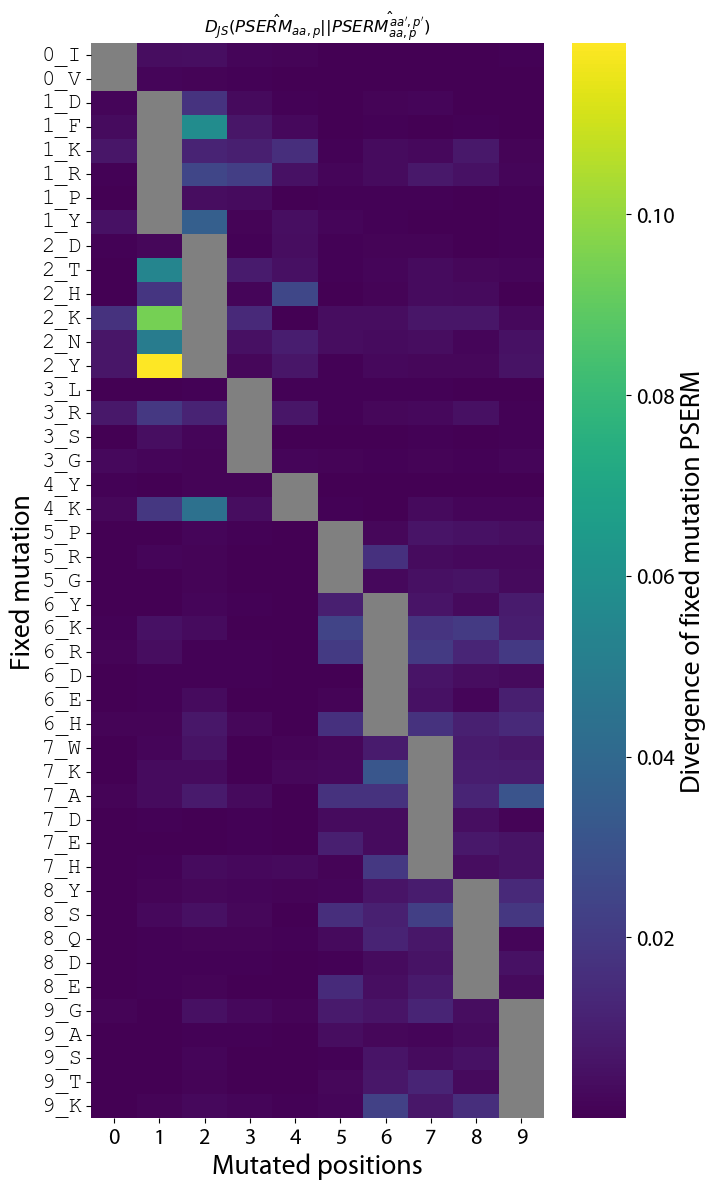

In [26]:
fig, ax = plt.subplots(figsize = (7.2 , 12))
############# Plot Heatmap of DJS ####################
ag_mask = np.zeros_like(p2_data.JS_data['QDN'])
row = 0
for j in range(len(p2_data.wt)):
    for _ in range(len(p2_data.library[j])):
        ag_mask[row, j] = 1
        row += 1

sns.heatmap(p2_data.JS_data['QDN'], mask = ag_mask, ax = ax, cmap = 'viridis')#, cbar_kws={"shrink": 0.55})
ax.set_facecolor('grey')

ax.set_xlabel('Mutated positions', fontproperties = prop)
ax.set_ylabel('Fixed mutation', fontproperties = prop)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(aaprop)
    tick.set_rotation(0)

cbar_label = r"Divergence of fixed mutation PSERM" 
ax_title = r"$\hat{D_{JS}(PSERM_{aa,p}}||\hat{PSERM^{aa',p'}_{aa,p}})$"

colorbar = ax.collections[0].colorbar
colorbar.set_label(cbar_label, fontproperties = prop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)
ax.set_title(ax_title)

plt.tight_layout()
#plt.savefig('Fig S2 All mutations Ag JS divergence.pdf')
plt.show()

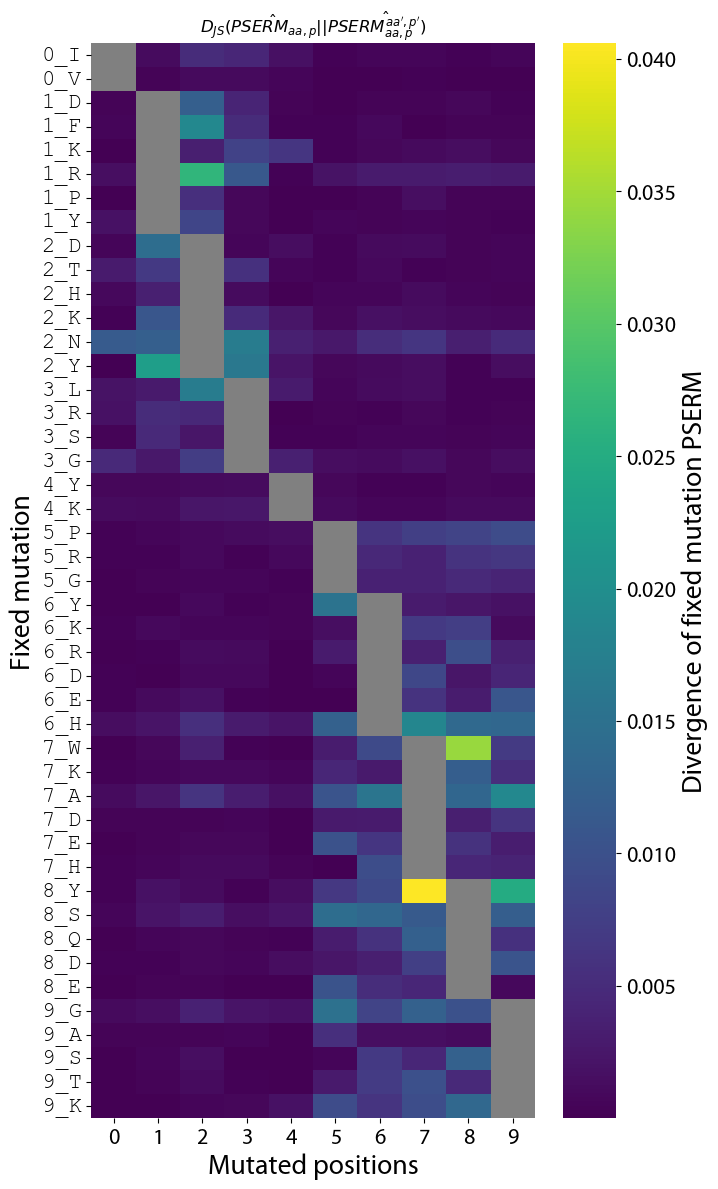

In [43]:
fig, ax = plt.subplots(figsize = (7.2 , 12))
############# Plot Heatmap of DJS ####################
ag_mask = np.zeros_like(p2_data.JS_data['AgN'])
row = 0
for j in range(len(p2_data.wt)):
    for _ in range(len(p2_data.library[j])):
        ag_mask[row, j] = 1
        row += 1

sns.heatmap(p2_data.JS_data['AgN'], mask = ag_mask, ax = ax, cmap = 'viridis')#, cbar_kws={"shrink": 0.55})
ax.set_facecolor('grey')

ax.set_xlabel('Mutated positions', fontproperties = prop)
ax.set_ylabel('Fixed mutation', fontproperties = prop)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(aaprop)
    tick.set_rotation(0)

cbar_label = r"Divergence of fixed mutation PSERM" 
ax_title = r"$\hat{D_{JS}(PSERM_{aa,p}}||\hat{PSERM^{aa',p'}_{aa,p}})$"

colorbar = ax.collections[0].colorbar
colorbar.set_label(cbar_label, fontproperties = prop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)
ax.set_title(ax_title)

plt.tight_layout()
#plt.savefig('Fig S2 All mutations Ag JS divergence.pdf')
plt.show()

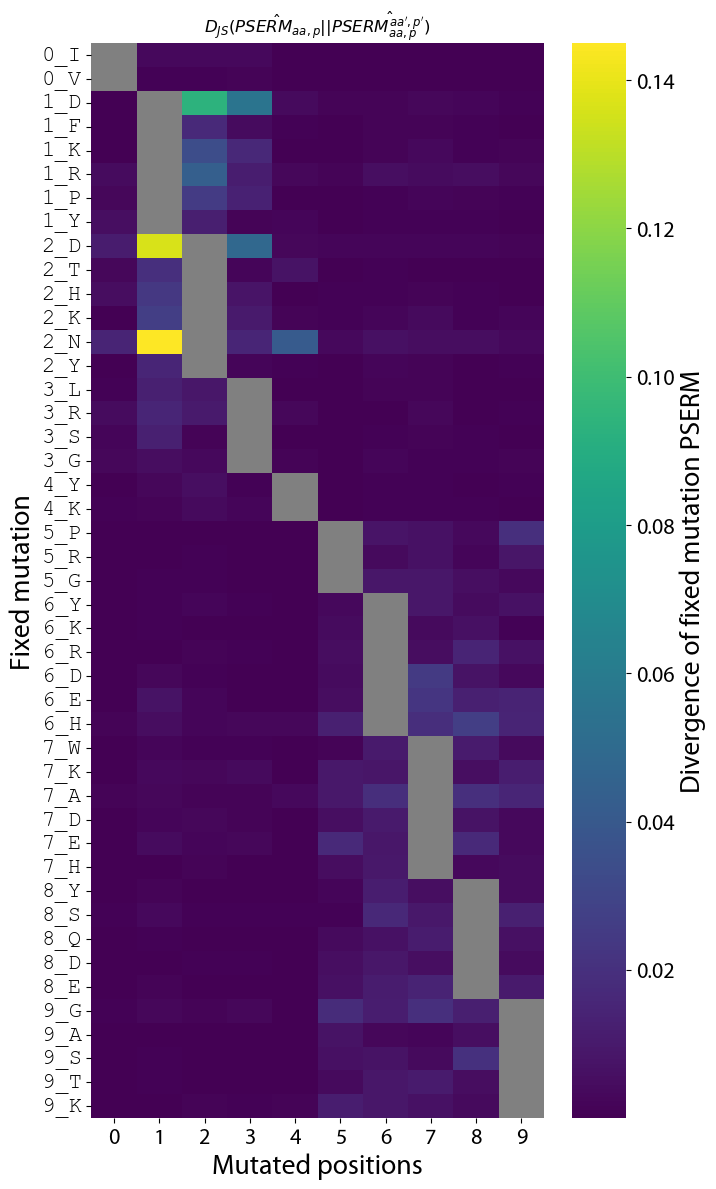

In [51]:
fig, ax = plt.subplots(figsize = (7.2 , 12))
############# Plot Heatmap of DJS ####################
ag_mask = np.zeros_like(p2_data.JS_data['QDP'])
row = 0
for j in range(len(p2_data.wt)):
    for _ in range(len(p2_data.library[j])):
        ag_mask[row, j] = 1
        row += 1

sns.heatmap(p2_data.JS_data['QDP'], mask = ag_mask, ax = ax, cmap = 'viridis')#, cbar_kws={"shrink": 0.55})
ax.set_facecolor('grey')

ax.set_xlabel('Mutated positions', fontproperties = prop)
ax.set_ylabel('Fixed mutation', fontproperties = prop)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(aaprop)
    tick.set_rotation(0)

cbar_label = r"Divergence of fixed mutation PSERM" 
ax_title = r"$\hat{D_{JS}(PSERM_{aa,p}}||\hat{PSERM^{aa',p'}_{aa,p}})$"

colorbar = ax.collections[0].colorbar
colorbar.set_label(cbar_label, fontproperties = prop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)
ax.set_title(ax_title)

plt.tight_layout()
#plt.savefig('Fig S2 All mutations Ag JS divergence.pdf')
plt.show()

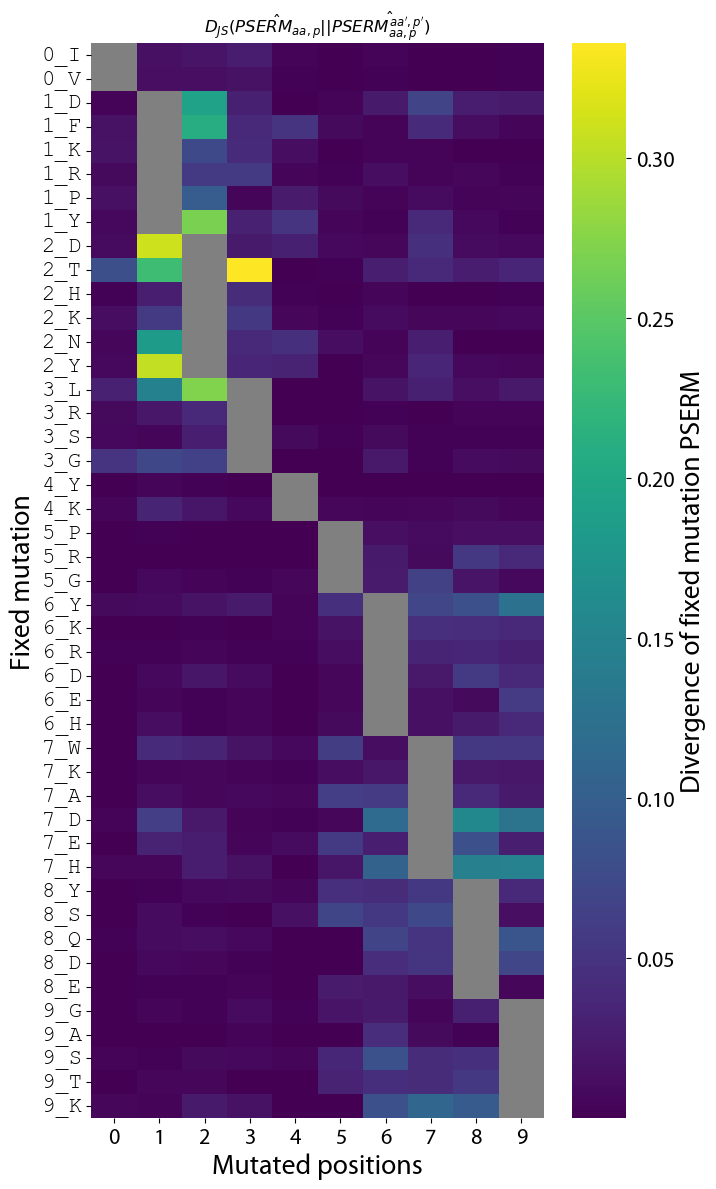

In [52]:
fig, ax = plt.subplots(figsize = (7.2 , 12))
############# Plot Heatmap of DJS ####################
ag_mask = np.zeros_like(p2_data.JS_data['EP'])
row = 0
for j in range(len(p2_data.wt)):
    for _ in range(len(p2_data.library[j])):
        ag_mask[row, j] = 1
        row += 1

sns.heatmap(p2_data.JS_data['EP'], mask = ag_mask, ax = ax, cmap = 'viridis')#, cbar_kws={"shrink": 0.55})
ax.set_facecolor('grey')

ax.set_xlabel('Mutated positions', fontproperties = prop)
ax.set_ylabel('Fixed mutation', fontproperties = prop)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(aaprop)
    tick.set_rotation(0)

cbar_label = r"Divergence of fixed mutation PSERM" 
ax_title = r"$\hat{D_{JS}(PSERM_{aa,p}}||\hat{PSERM^{aa',p'}_{aa,p}})$"

colorbar = ax.collections[0].colorbar
colorbar.set_label(cbar_label, fontproperties = prop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)
ax.set_title(ax_title)

plt.tight_layout()
#plt.savefig('Fig S2 All mutations Ag JS divergence.pdf')
plt.show()

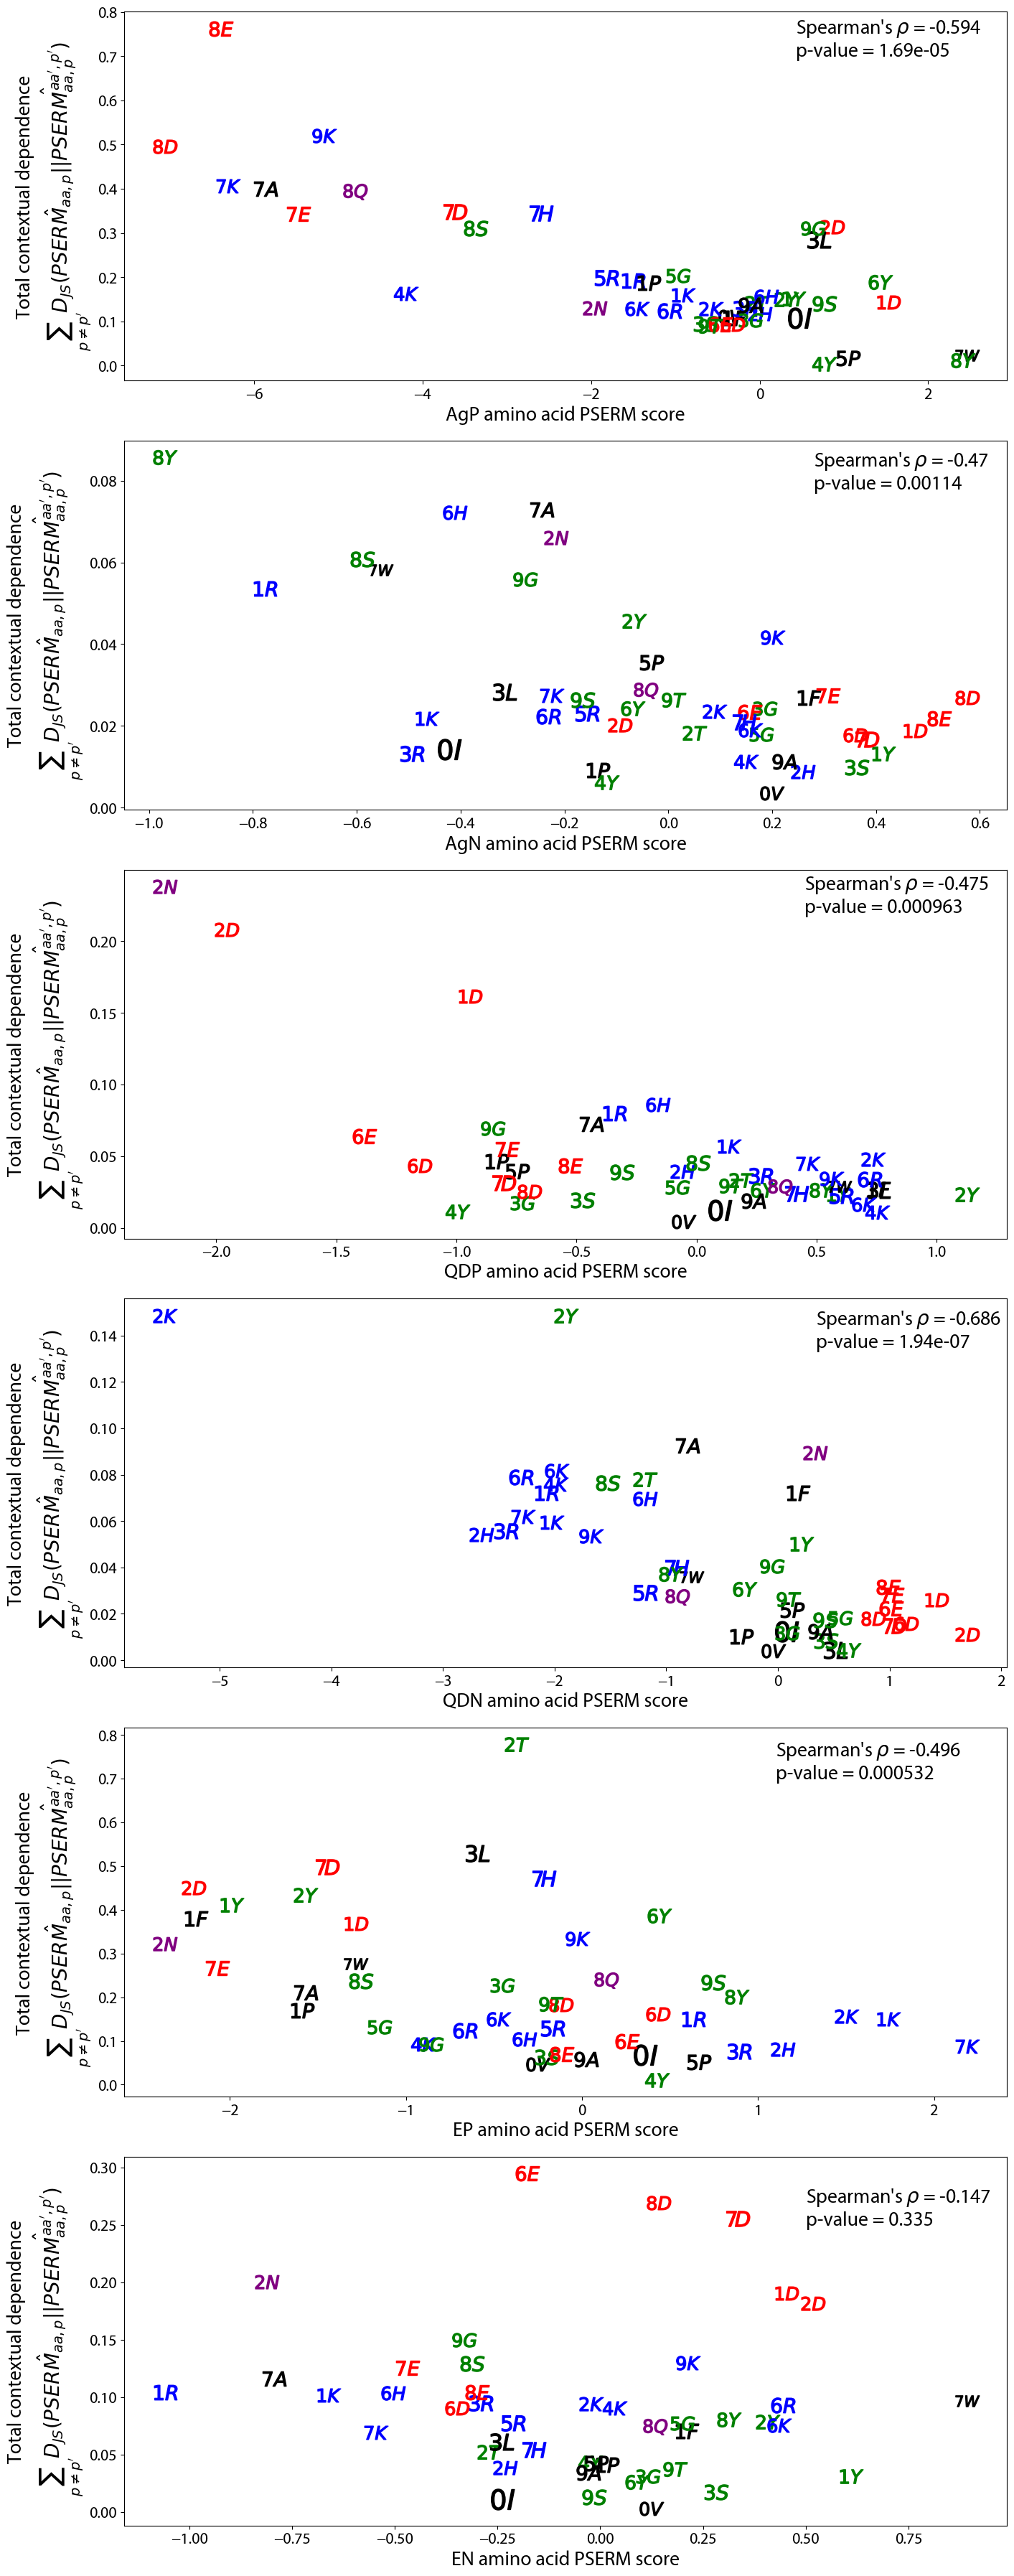

In [77]:
fig, axs = plt.subplots(6, 1, figsize = (7.2 * 2, 6 * 6))

sample = ['AgP', 'AgN', 'QDP', 'QDN', 'EP', 'EN']
loc = [(0.425, 0.7), (0.28, 0.078), (0.45, 0.22), (0.34, 0.135), (1.1, 0.7), (0.5, 0.25)]

for i, ax in enumerate(axs.ravel()):

    ax.set_xlabel(f'{sample[i]} amino acid PSERM score', fontproperties = prop)

    ax_ylabel = 'Total contextual dependence\n'
    ax_ylabel += r"$\sum_{p \neq p'}{D_{JS}(\hat{PSERM_{aa,p}}||\hat{PSERM^{aa',p'}_{aa,p}})}$"
    ax.set_ylabel(ax_ylabel, fontproperties = prop)

    mask = np.zeros_like(p2_data.JS_data[sample[i]])
    row = 0
    for j in range(len(p2_data.wt)):
        for _ in range(len(p2_data.library[j])):
            mask[row, j] = 1
            row += 1

    x, y = [], []
    for pos, aa_list in p2_data.library.items():
        for aa in aa_list:
            x.append(p2_data.PSERM[sample[i]].loc[aa, pos])
            y.append(((1 - mask) * p2_data.JS_data[sample[i]]).loc[f'{pos}_{aa}', :].sum())

            ax.plot(x[-1], y[-1], color = chemistry[aa], marker = f'${pos}{aa}$', markersize = 25)
    r, p = spearmanr(x, y)
    corr_text = r"Spearman's $\rho$ = " + f'{r:.3}\n' + f'p-value = {p:.3}'
    ax.annotate(corr_text, loc[i], fontproperties = prop)

    for tick in ax.get_xticklabels():
        tick.set_fontproperties(tickprop)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(tickprop)
plt.tight_layout()
#plt.savefig('Fig 4. Contextual Preference.pdf')

plt.show()